# Problem 1

### **Please read the instructions carefully before starting the project.**
This is a commented Jupyter IPython Notebook file in which all the instructions and tasks to be performed are mentioned.
* Blanks '_______' are provided in the notebook that
needs to be filled with an appropriate code to get the correct result. With every '_______' blank, there is a comment that briefly describes what needs to be filled in the blank space.
* Identify the task to be performed correctly, and only then proceed to write the required code.
* Fill the code wherever asked by the commented lines like "# write your code here" or "# complete the code". Running incomplete code may throw error.
* Please run the codes in a sequential manner from the beginning to avoid any unnecessary errors.
* Add the results/observations (wherever mentioned) derived from the analysis in the presentation and submit the same.

## Importing the necessary libraries

In [1]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

#Library to scale the data
from sklearn.preprocessing import StandardScaler

# Library to split data
from sklearn.model_selection import train_test_split

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis



# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
    mean_absolute_error,
    mean_squared_error,
    r2_score,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
learn = pd.read_csv("/content/drive/MyDrive/Great Learning/Dataset2/Firm_level_data.csv.xls")

In [4]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset

In [5]:
data.head() ##  Complete the code to view top 5 rows of the data

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
0,0,826.99505,161.60399,10,382.07825,2.30600,no,11.04951,1625.45376,80.27000
1,1,407.75397,122.10101,2,0.00000,1.86000,no,0.84419,243.11708,59.02000
2,2,8407.84559,6221.14461,138,3296.70044,49.65900,yes,5.20526,25865.23380,47.70000
3,3,451.00001,266.89999,1,83.54016,3.07100,no,0.30522,63.02463,26.88000
4,4,174.92798,140.12400,2,14.23364,1.94700,no,1.06330,67.40641,49.46000


In [6]:
data.tail() ##  Complete the code to view top 5 rows of the data

,Unnamed: 0,sales,capital,patents,randd,employment,sp500,tobinq,value,institutions
754,754,1253.90020,708.29994,32,412.93616,22.10000,yes,0.69745,267.11949,33.50000
755,755,171.82102,73.66601,1,0.03774,1.68400,no,NaN,228.47570,46.41000
756,756,202.72697,123.92699,13,74.86110,1.46000,no,5.22972,580.43074,42.25000
757,757,785.68794,138.78099,6,0.62175,2.90000,yes,1.62540,309.93865,61.39000
758,758,22.70200,14.24500,5,18.57436,0.19700,no,2.21307,18.94014,7.50000


### Understand the shape of the dataset

In [7]:
# data."________" ## Complete the code to get the shape of data

In [8]:
print(f'There are {data.shape[0]} rows & {data.shape[1]} columns in this dataset')

There are 759 rows & 10 columns in this dataset


### Check the data types of the columns for the dataset

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 759 entries, 0 to 758
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    759 non-null    int64  
 1   sales         759 non-null    float64
 2   capital       759 non-null    float64
 3   patents       759 non-null    int64  
 4   randd         759 non-null    float64
 5   employment    759 non-null    float64
 6   sp500         759 non-null    object 
 7   tobinq        738 non-null    float64
 8   value         759 non-null    float64
 9   institutions  759 non-null    float64
dtypes: float64(7), int64(2), object(1)
memory usage: 59.4+ KB


There are 2 integer, 7 float, & a lone object type feature in this dataset.

### Dropping the duplicate values

In [10]:
# checking for duplicate values
data.duplicated().sum() ## Complete the code to check duplicate entries in the data

0

There are no duplicate records in this dataset.

### Dropping the unique values column

In [11]:
# checking the number of unique values
data["Unnamed: 0"].nunique()

759

This above feature don't seem to add any value in this analysis. Therefore, we'll drop it.

**Let's drop the column first before we proceed forward**.

In [12]:
data = data.drop("Unnamed: 0", axis=1)

**Let's check the statistical summary of the data.**

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
sales,759.00000,2689.70516,8722.06012,0.13800,122.92000,448.57708,1822.54737,135696.78820
capital,759.00000,1977.74750,6466.70490,0.05700,52.65050,202.17902,1075.79002,93625.20056
patents,759.00000,25.83136,97.25958,0.00000,1.00000,3.00000,11.50000,1220.00000
randd,759.00000,439.93807,2007.39759,0.00000,4.62826,36.86414,143.25340,30425.25586
employment,759.00000,14.16452,43.32144,0.00600,0.92750,2.92400,10.05000,710.79993
tobinq,738.00000,2.79491,3.36659,0.11900,1.01878,1.68030,3.13931,20.00000
value,759.00000,2732.73475,7071.07236,1.97105,103.59395,410.79353,2054.16039,95191.59116
institutions,759.00000,43.02054,21.68559,0.00000,25.39500,44.11000,60.51000,90.15000


*Let's check if there are missing values in this dataset *

In [14]:
data.isnull().sum().sum()

21

In [15]:
print(f'There are {data.isnull().sum().sum()} missing values in this dataset.')

There are 21 missing values in this dataset.



**Let's check which feature has missing values.**

In [16]:
for i in data.columns:
    if data[i].isnull().sum() > 0:
        print(i)

tobinq


In [17]:
data['tobinq'].isnull().sum()

21

In [18]:
round(21/759, 2)

0.03

A very insignificant amount of missing values are present in this feature. Therefore, we won't drop it, rather we will replace these missing values.

## Exploratory Data Analysis

In [19]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes(include='object').columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

sp500
no     542
yes    217
Name: count, dtype: int64
--------------------------------------------------


**The below functions need to be defined to carry out the EDA.**

In [20]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [22]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [23]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on sales

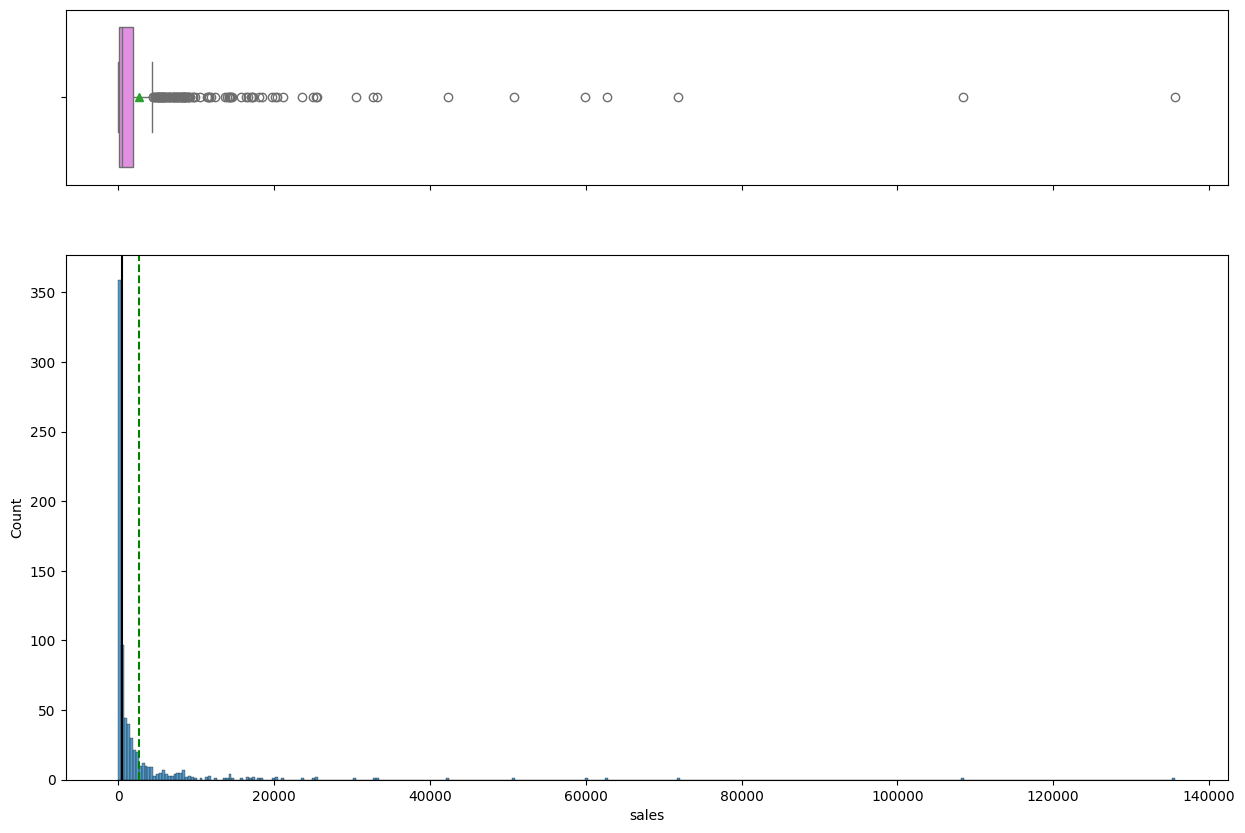

In [24]:
histogram_boxplot(data, "sales")

Key Observations:
- The data in this feature is right skewed which indicates that the data isn't normally distributed.
- Most of the firms recorded lower sales which is less than 15000 millions dollars.
- The firms which had lower sales has accounted for the major part of the sales in this dataset.
- There are a few outliers which indicates that, there are a few firms which has done a lot better in terms of sales.

#### Observations on Capital

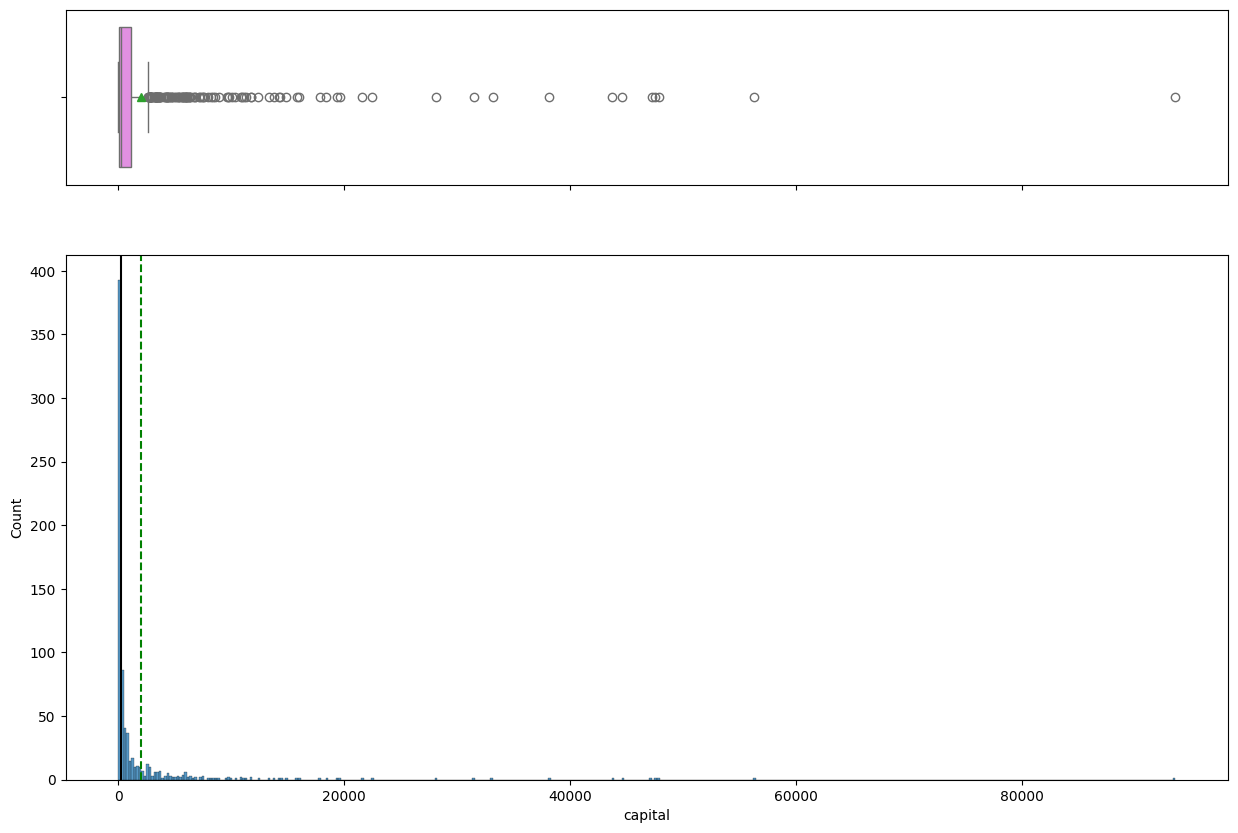

In [25]:
histogram_boxplot(data, "capital")

Key Observations -
- The data in this feature is right skewed, it's not normally distributed.
- Most of the firms have less stocks, whereas, a few of them have more stocks.
- The outliers present here indicates this.

#### Observations on number of patents

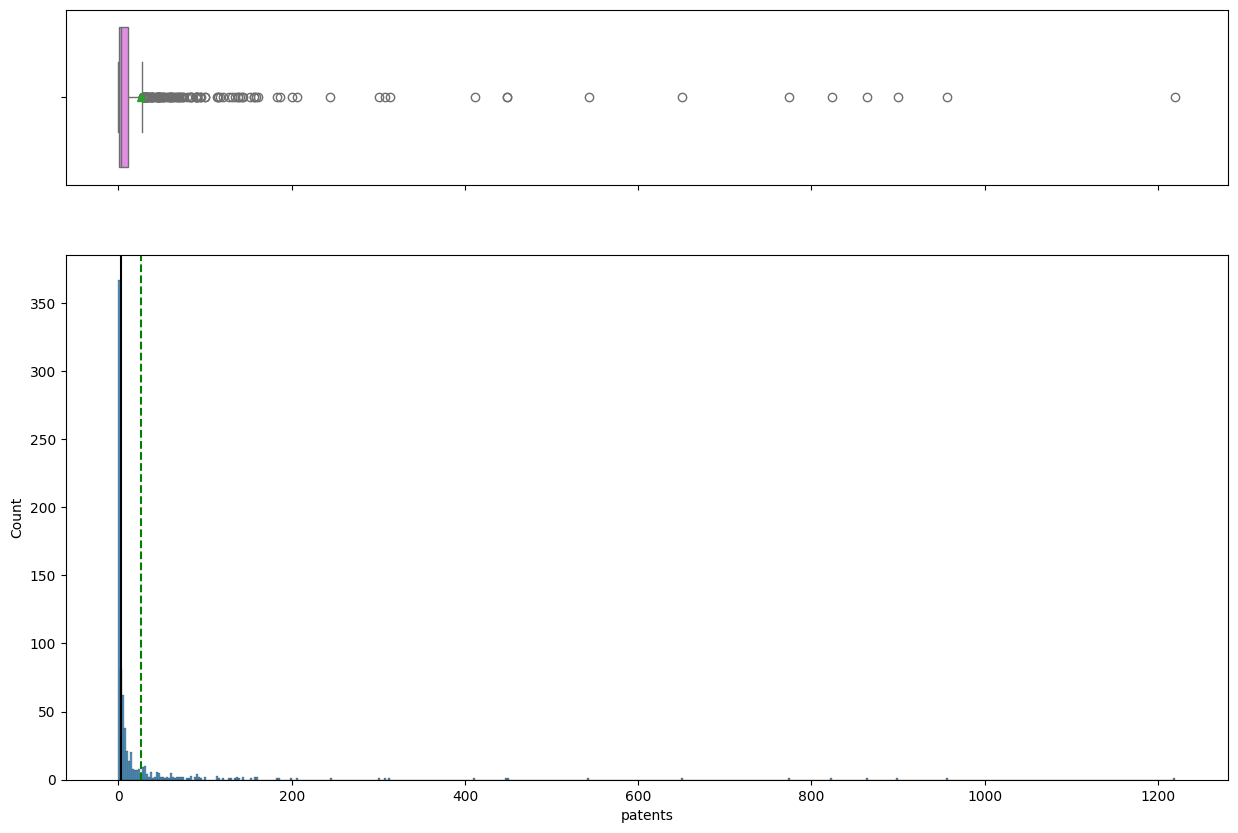

In [26]:
histogram_boxplot(data, "patents")

#### Observations on number of R&D

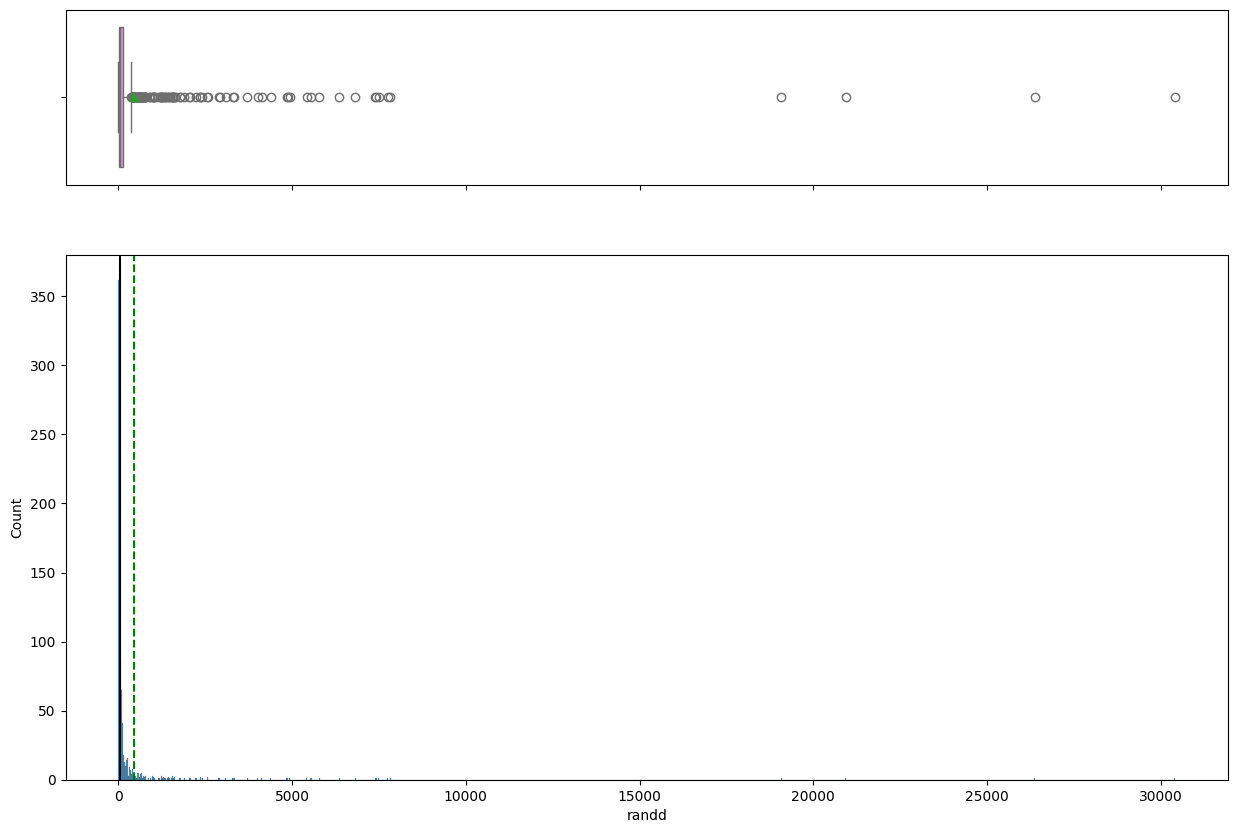

In [27]:
histogram_boxplot(data, "randd")

#### Observations on number of employment

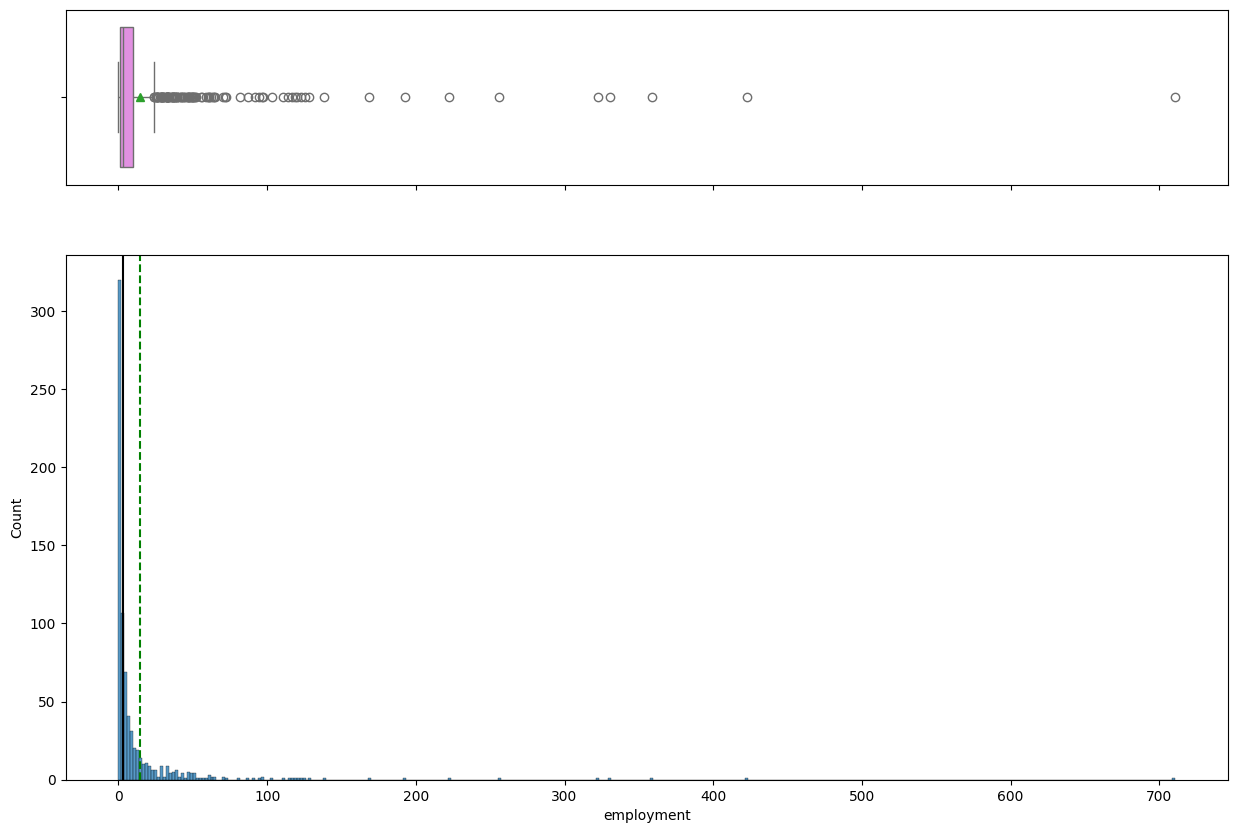

In [28]:
histogram_boxplot(data, "employment")

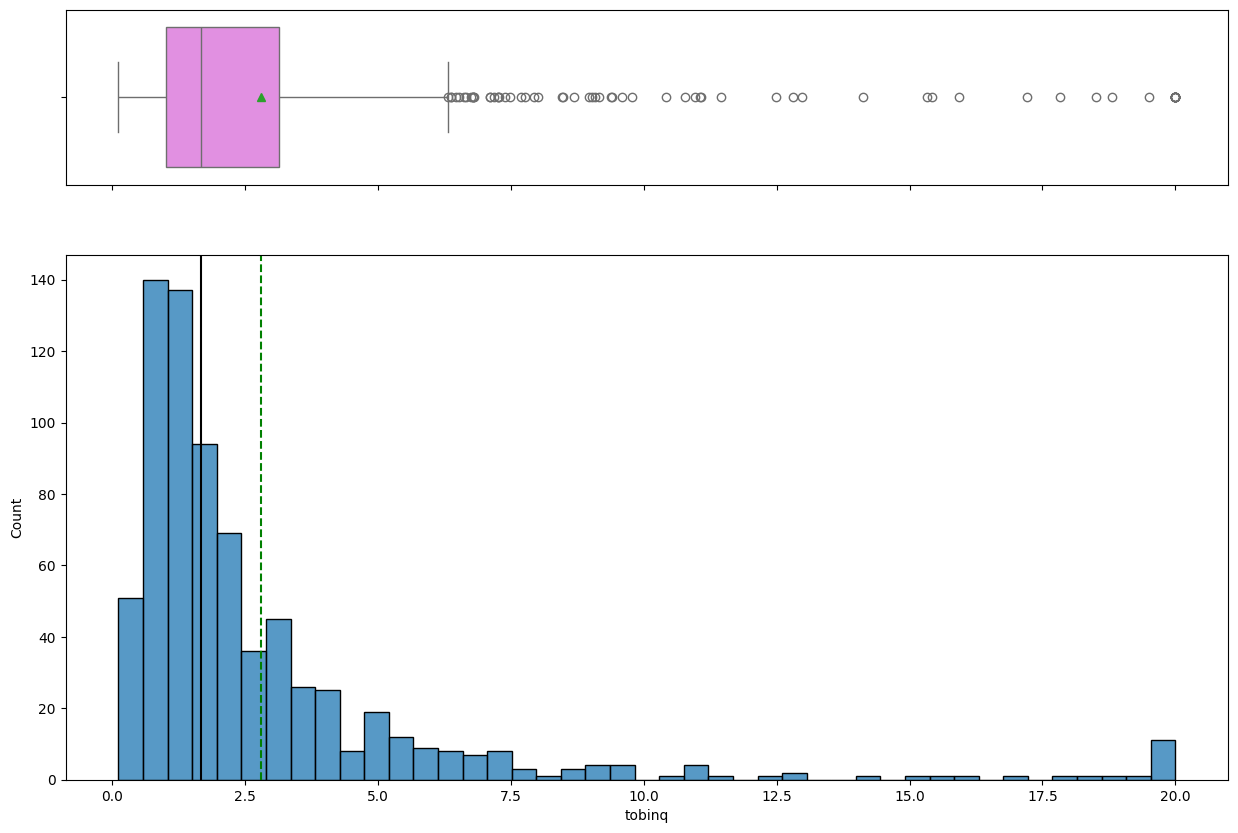

In [29]:
histogram_boxplot(data, "tobinq")

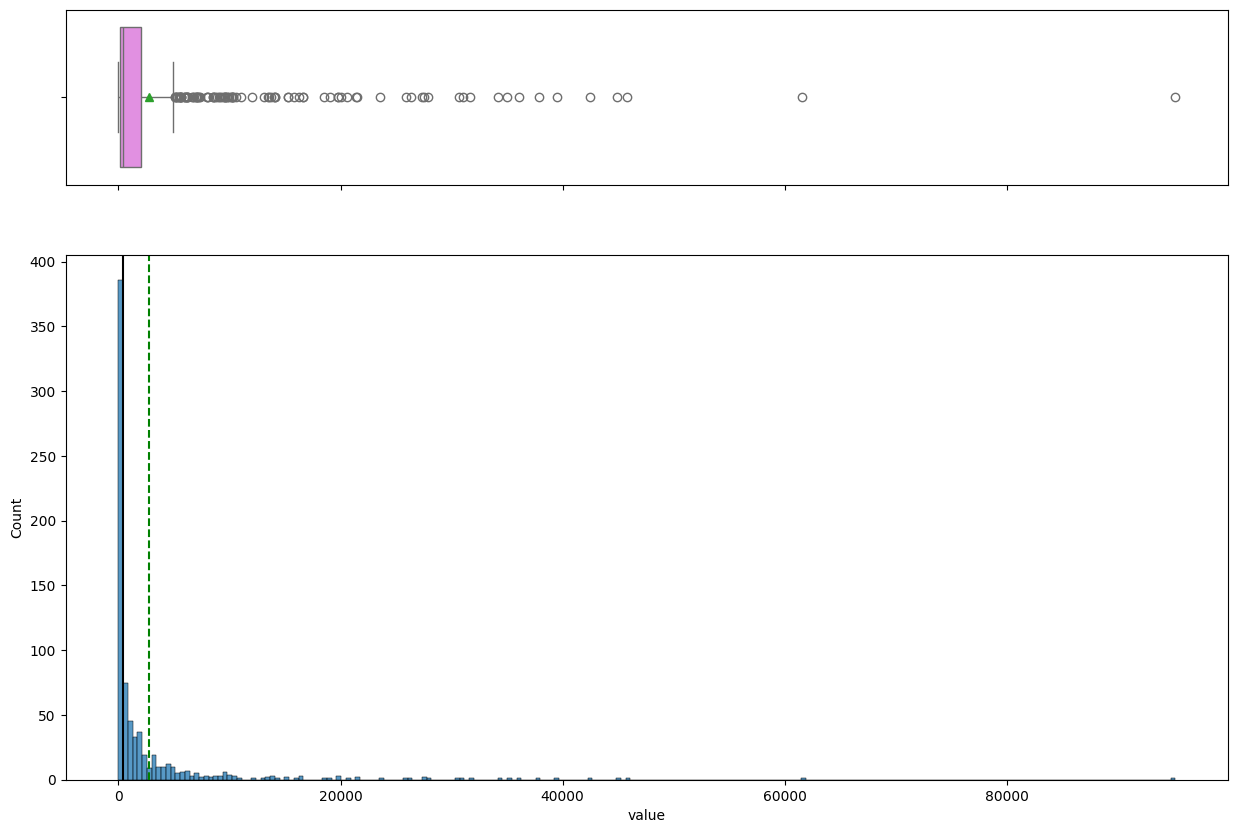

In [30]:
histogram_boxplot(data, "value")

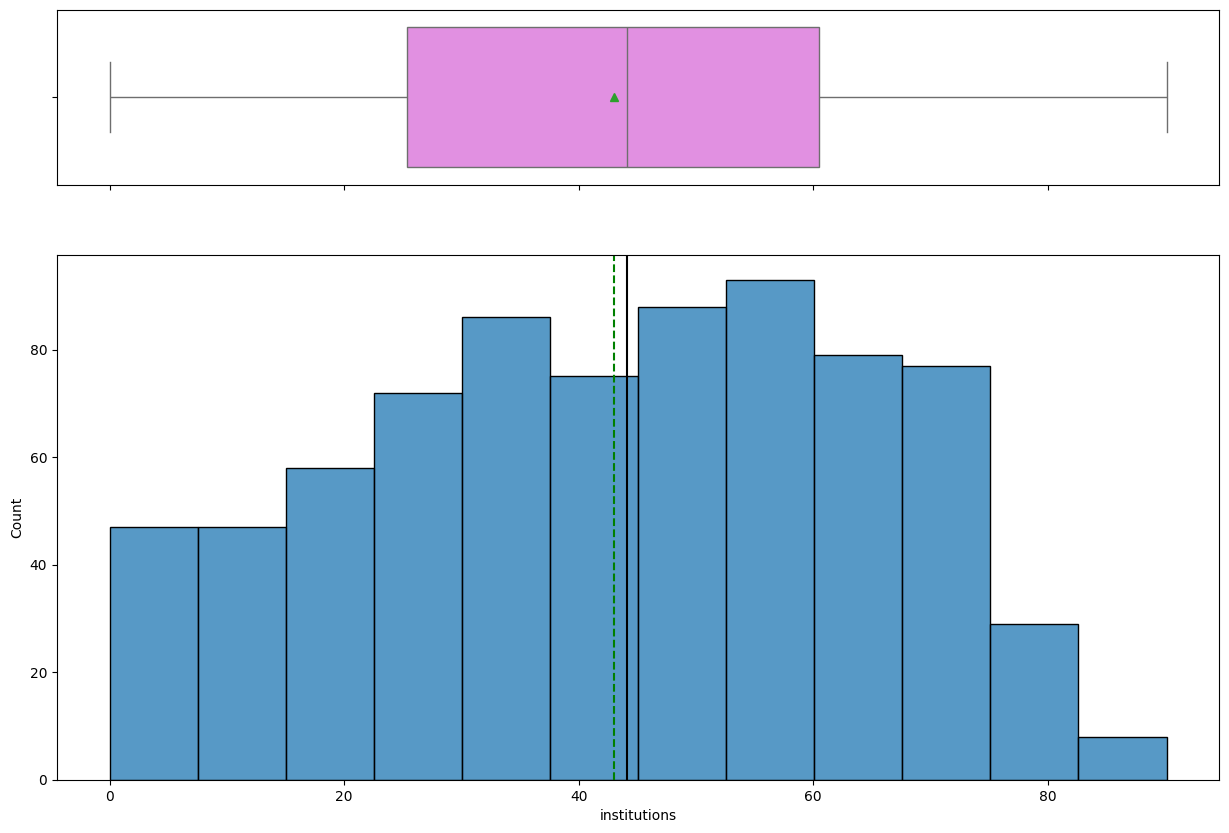

In [31]:
histogram_boxplot(data, "institutions")

Key Obs -
- It is normally distributed.

### Bivariate Analysis

#### Observation of employment on sales

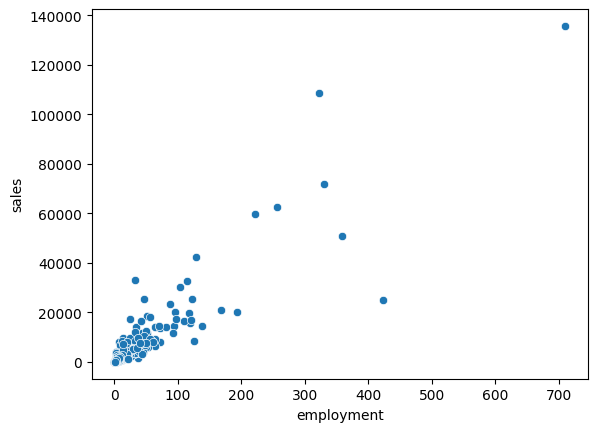

In [32]:
#### Observation of employment on sales
sns.scatterplot(data=data, x="employment", y="sales")
plt.show()

Key Obs -
- There is a positive relationship between employment & sales.
- This indicates that, higher employment tends to be associated with higher sales.
- This suggests that firms with more employees generally generate more sales.
- Most data points are clustered at lower levels of employment (0-100) and sales (0-20,000).
- This indicates that the majority of firms in the dataset are small to medium-sized with modest employment and sales figures.
- The outliers indicates that, there are a few firms with very high employment (above 300) and extremely high sales (above 40,000).
- One firm stands out as an extreme outlier with employment over 700 and sales exceeding 140,000.

#### Observation of Patents on sales

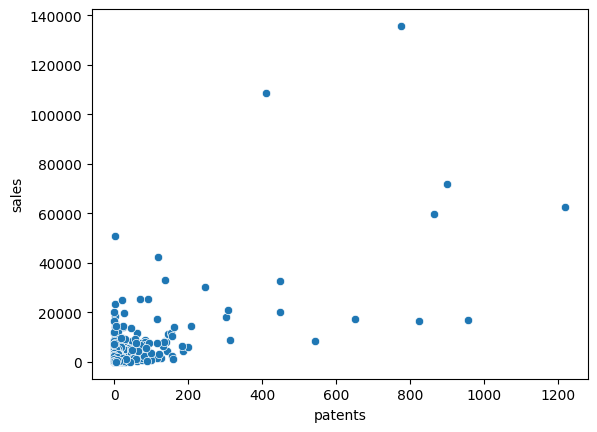

In [33]:
sns.scatterplot(data=data, x="patents", y="sales")
plt.show()

Key Obs -
- The scatter plot does not show a clear linear or strong relationship between the number of patents and sales. While firms with higher patents may generate higher sales, this trend is not consistent across all data points.
- Most firms have a relatively low number of patents (0–200) and corresponding low sales values (0–20,000).
- This indicates that the majority of firms in the dataset may not heavily rely on patents as a core factor driving their sales.
- There are outliers with significantly high values of patents (e.g., above 800) and sales (above 100,000). These represent firms with substantial intellectual property holdings and exceptional sales performance.
- One extreme outlier with both patents exceeding 1200 and sales nearing 140,000 stands out.

#### Observation of tobinq on sales

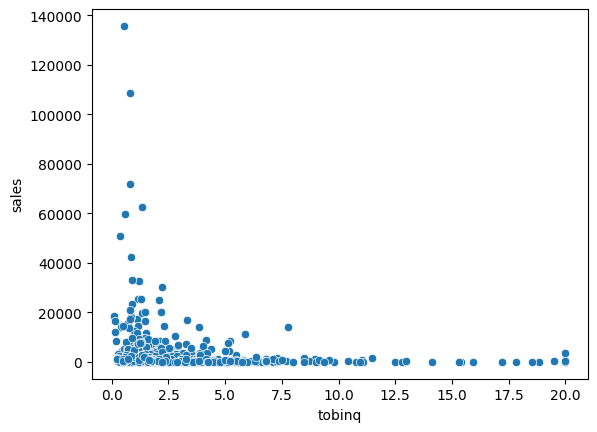

In [34]:
sns.scatterplot(data=data, x="tobinq", y="sales")
plt.show()

Key Obs -
- There is an inverse relation between these two.
- The plot shows a downward trend where firms with higher values of Tobin's q generally tend to have lower sales.
- Most data points are concentrated at lower values of Tobin's q (0–2.5) and sales (0–20,000). This suggests that the majority of firms have low market value relative to replacement value and modest sales figures.
- For lower values of Tobin's q (e.g., below 2.5), sales values vary widely, ranging from very low to extremely high. This indicates that Tobin's q may not fully explain variations in sales within this range.
- As Tobin's q increases beyond 5, sales values become consistently low, with few firms showing significant sales.
- There are a few firms with exceptionally high sales (e.g., above 100,000) even with low Tobin's q. These firms might be special cases warranting further investigation.

#### Distribution of sales on sp500

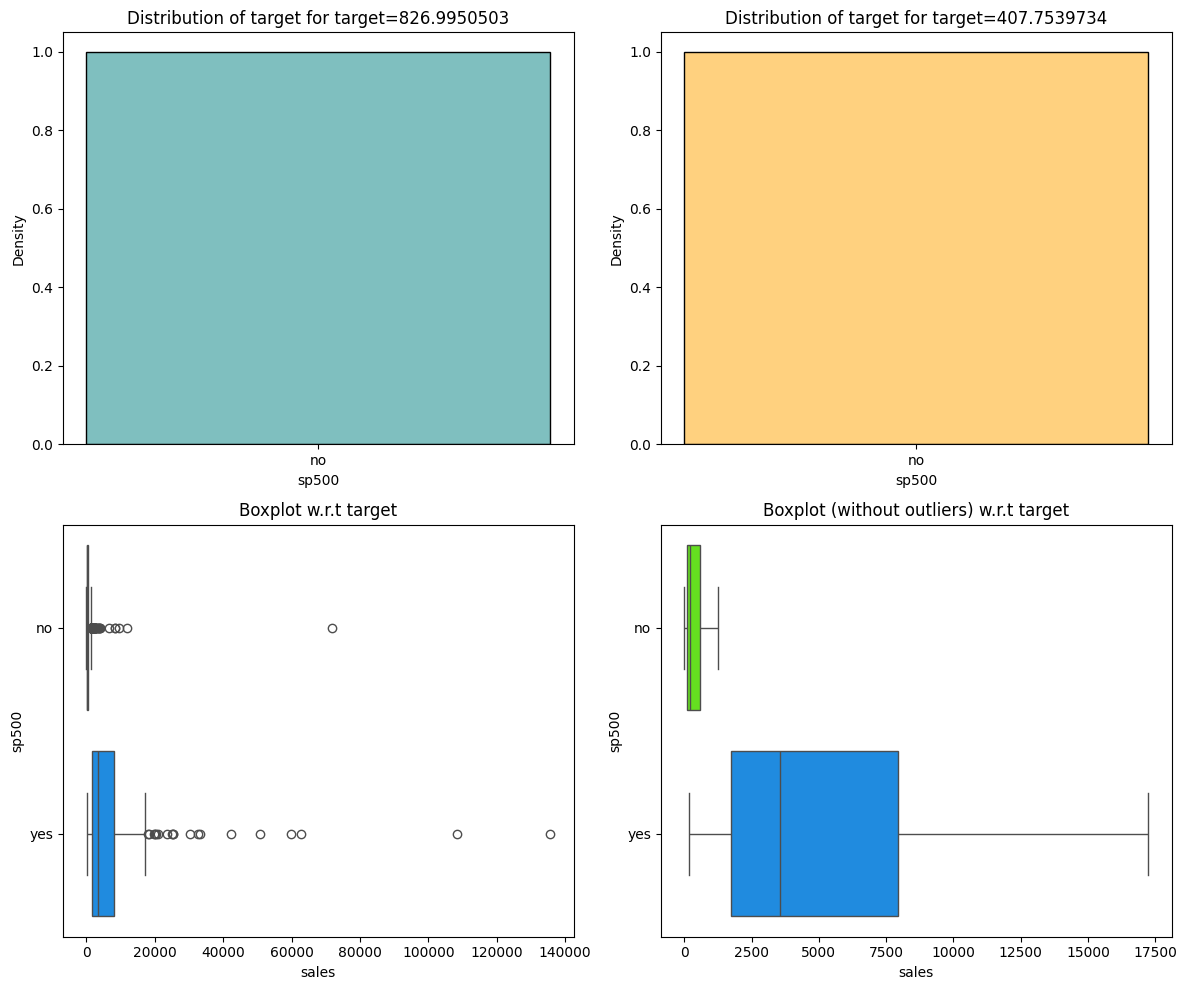

In [35]:
distribution_plot_wrt_target(data,"sp500","sales")

Key Obs -
- There's a strong indication that companies included in the S&P 500 generally have higher sales compared to those that are not.

#### Correlation Map

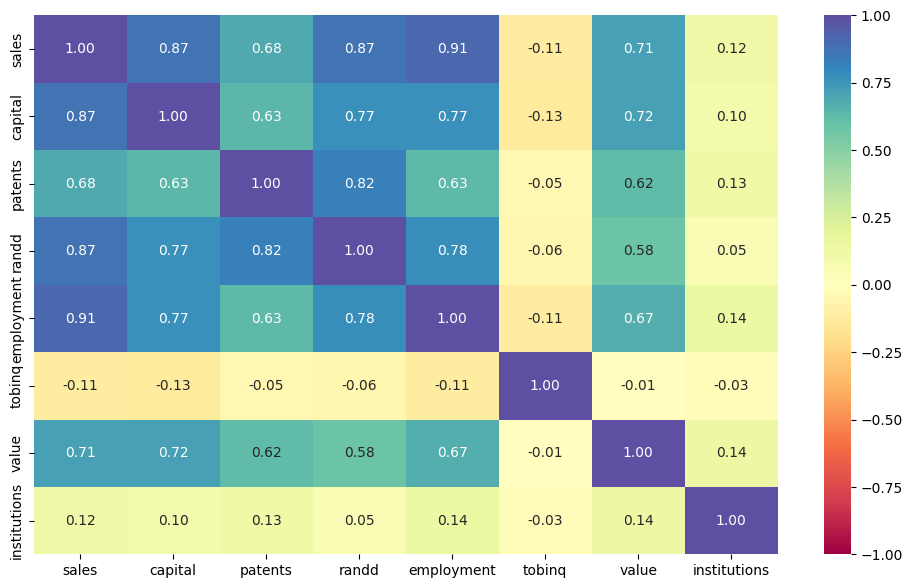

In [36]:
cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

Key Obs -
- The heatmap reveals strong relationships between core business activities like sales, capital investment, R&D, patent creation, employment, and market value.
- Companies with higher sales tend to have more resources in these areas, and these factors often reinforce each other.
- Tobin's Q, however, seems to be less related to these operational aspects, suggesting it's influenced by other factors not included in this analysis.

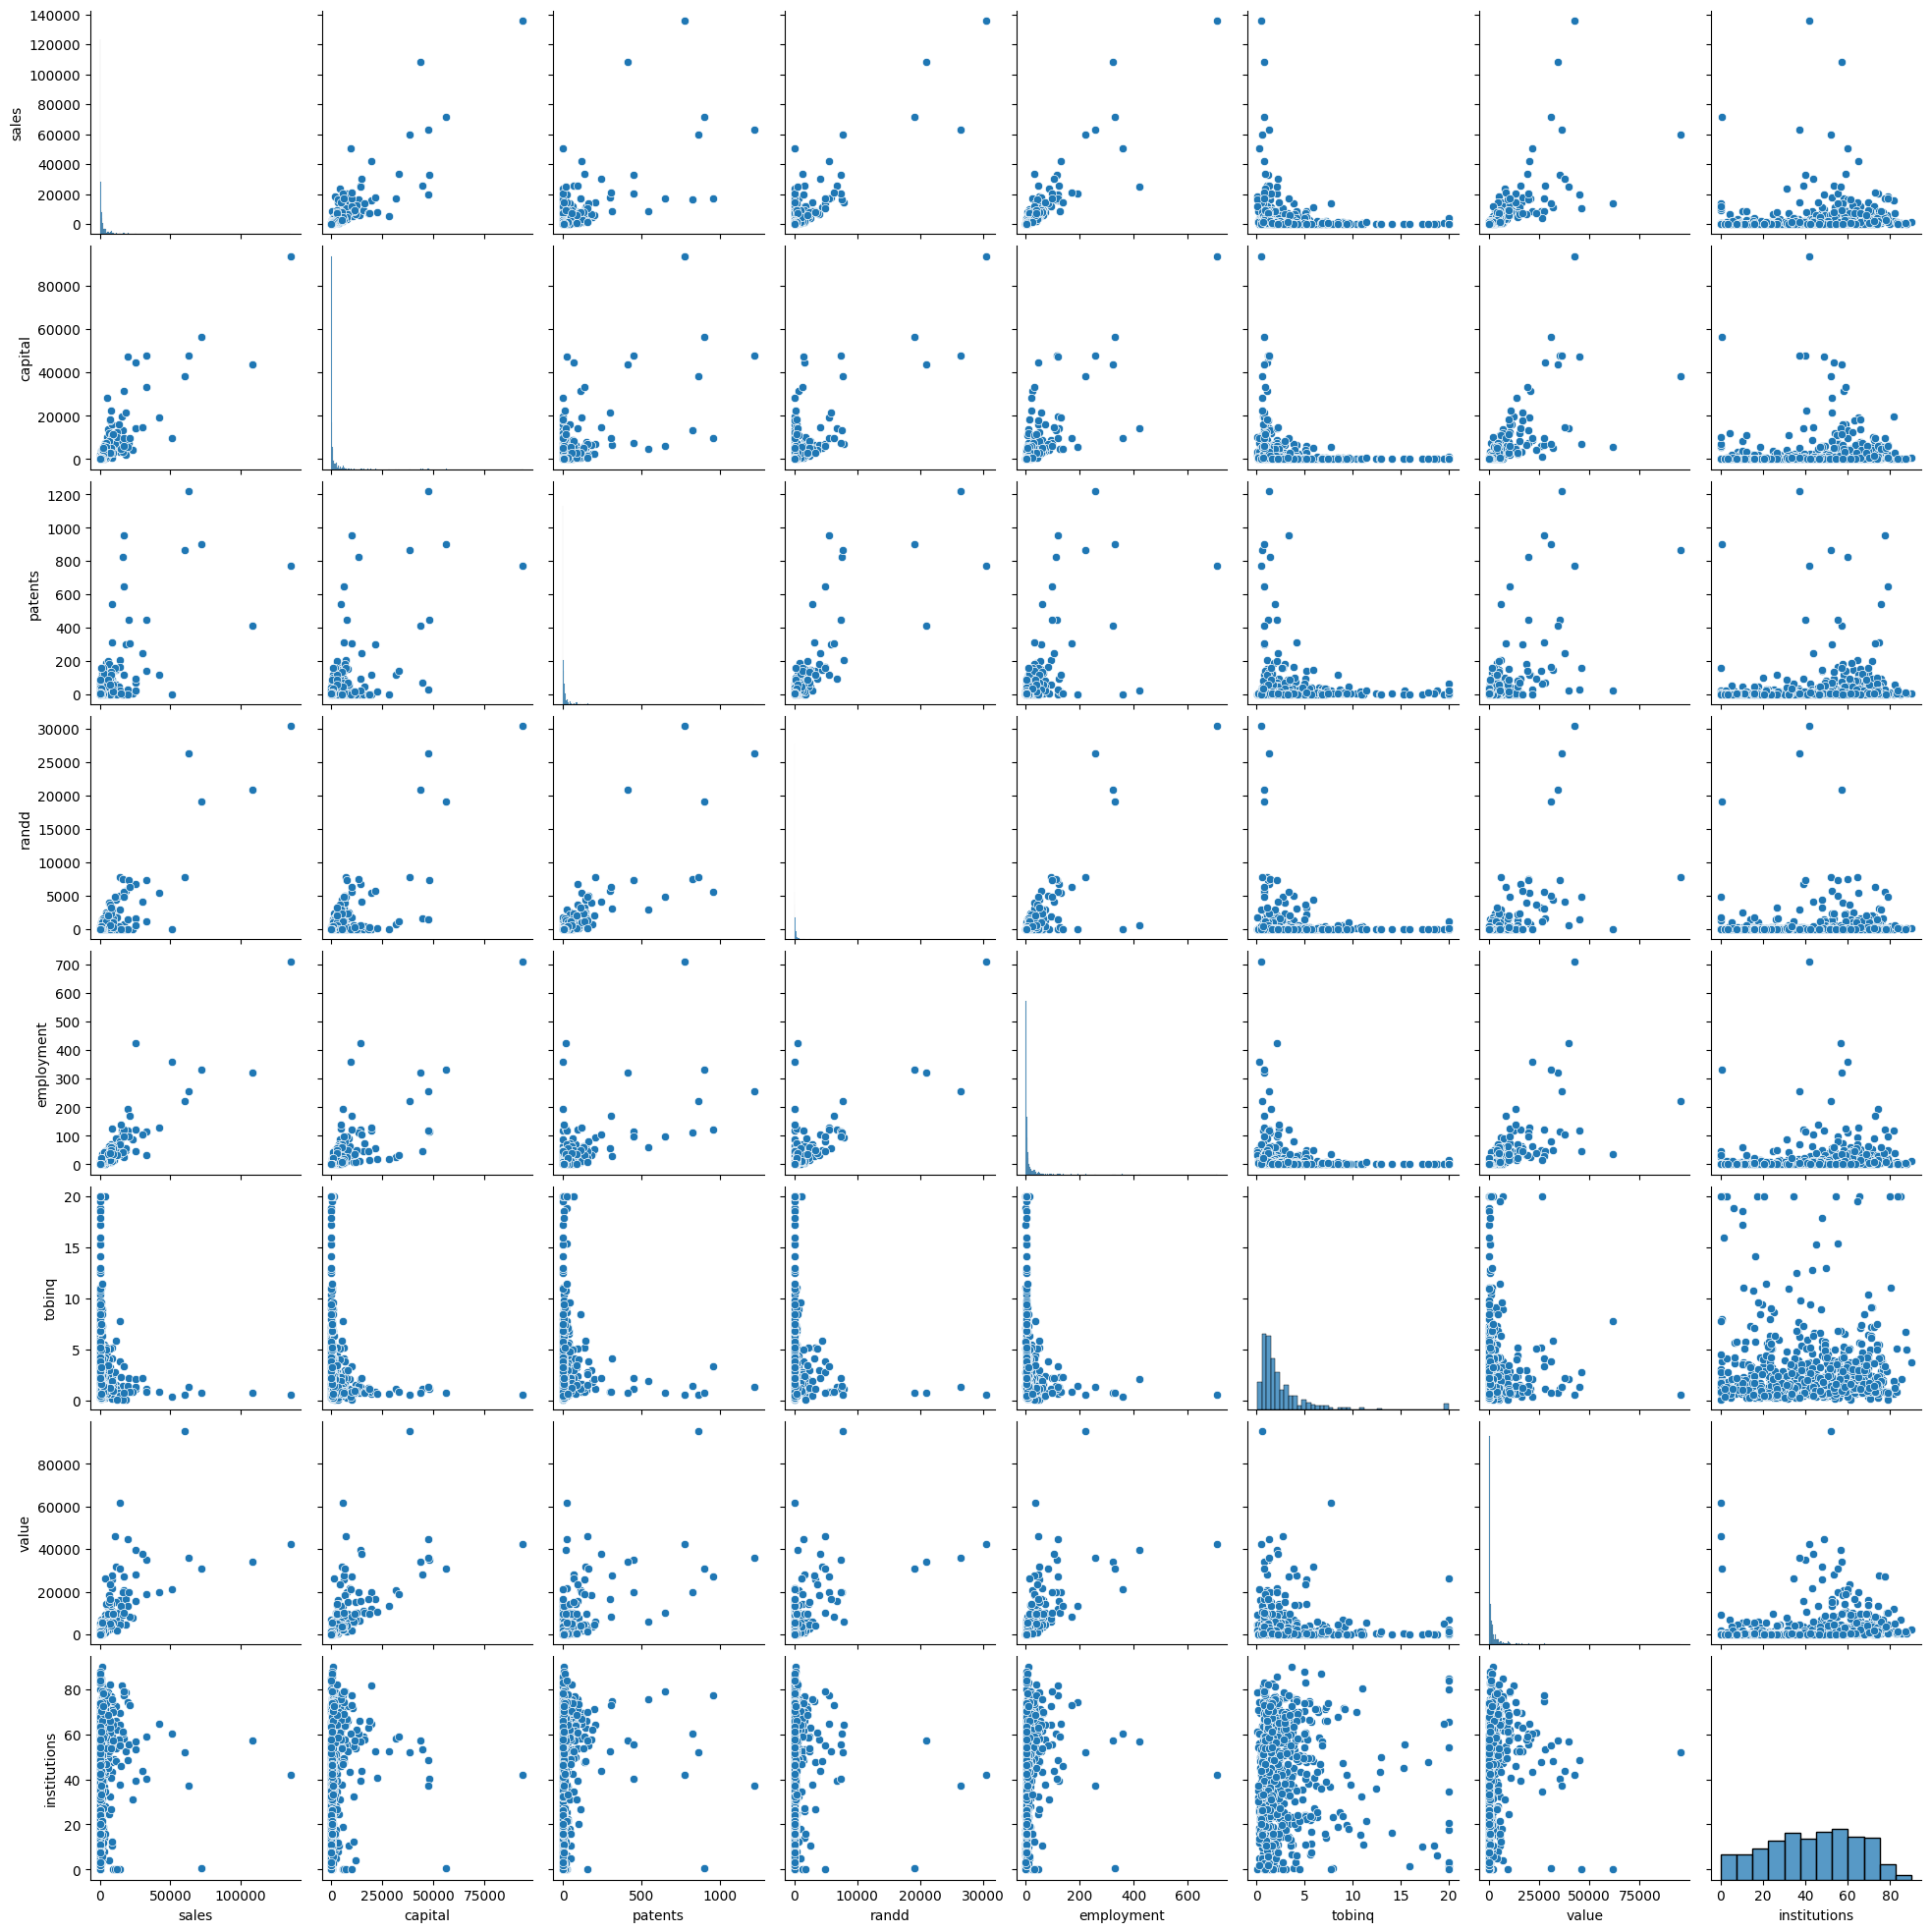

In [37]:
sns.pairplot(data)

Key Obs -
- Right-skewed variables with outliers suggest exceptional high values.
- Positive correlations (e.g., sales/capital, sales/employment) mean these tend
  to increase together.
- Slight negative sales/tobing correlation hints at potential undervaluation of
  larger companies.
- Non-linear relationships indicate complex interactions between variables.
- Outliers represent companies deviating from general trends.
- Correlations don't imply causation; other factors may be at play.
- Point density shows data concentration for specific value combinations.

## Date Pre-processing

### Missing Value Treatment

In [38]:
data['tobinq'].isnull().sum().sum()

21

In [39]:
data['tobinq'] = data['tobinq'].fillna(0) # Impute the null values with a suitable measure

In [40]:
data.isnull().sum().sum()

0

### Outlier Check

- Let's check for outliers in the data.

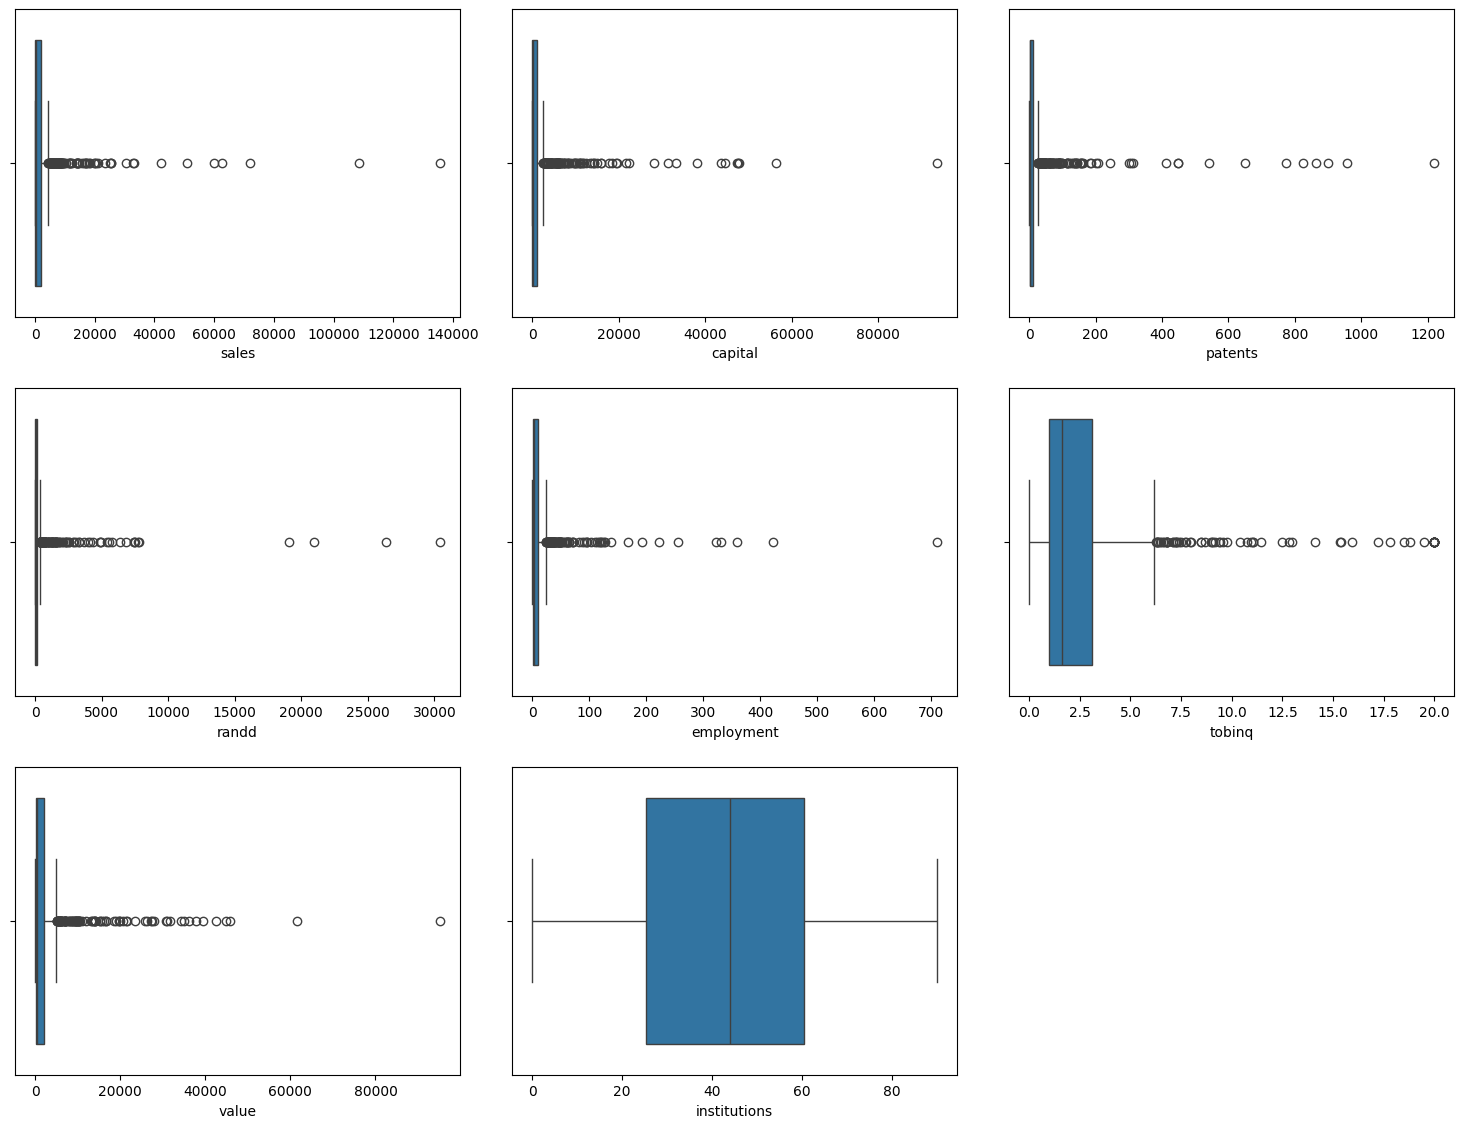

In [41]:
# outlier detection using boxplot
num_cols = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    sns.boxplot(data=data, x=variable)  # Plot a suitable visual to check outliers
    plt.tight_layout(pad=2)

plt.show()

Based on the boxplot and the descriptive statistics, here are the key inferences:

- Sales, Capital, Randd, and Value: These have the highest medians, indicating larger values compared to other variables. They also have the largest spread (difference between the upper and lower whiskers), suggesting a wide range of values.
- Patents and Employment: These have the lowest medians and the smallest spread, indicating a smaller range of values and less variability compared to the other variables.
- Tobinq: This has a moderate median and spread, suggesting a moderate range of values.
- Institutions: This has a relatively small spread, indicating less variability in the number of institutions.

### Encoding

In [42]:
# defining the dependent and independent variables
X = data.drop(["sales"], axis=1)
y = data["sales"]

print(X.head())
print()
print(y.head())

     capital  patents      randd  employment sp500   tobinq       value  \
0  161.60399       10  382.07825     2.30600    no 11.04951  1625.45376   
1  122.10101        2    0.00000     1.86000    no  0.84419   243.11708   
2 6221.14461      138 3296.70044    49.65900   yes  5.20526 25865.23380   
3  266.89999        1   83.54016     3.07100    no  0.30522    63.02463   
4  140.12400        2   14.23364     1.94700    no  1.06330    67.40641   

   institutions  
0      80.27000  
1      59.02000  
2      47.70000  
3      26.88000  
4      49.46000  

0    826.99505
1    407.75397
2   8407.84559
3    451.00001
4    174.92798
Name: sales, dtype: float64


In [43]:
# let's add the intercept to data
X = sm.add_constant(X)

In [44]:
# creating dummy variables
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
) # perform dummy encoding on the categoriacal features

X.head()

,const,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
0,1.00000,161.60399,10,382.07825,2.30600,11.04951,1625.45376,80.27000,False
1,1.00000,122.10101,2,0.00000,1.86000,0.84419,243.11708,59.02000,False
2,1.00000,6221.14461,138,3296.70044,49.65900,5.20526,25865.23380,47.70000,True
3,1.00000,266.89999,1,83.54016,3.07100,0.30522,63.02463,26.88000,False
4,1.00000,140.12400,2,14.23364,1.94700,1.06330,67.40641,49.46000,False


In [45]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

In [46]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 531
Number of rows in test data = 228


In [47]:
x_train.head()

,const,capital,patents,randd,employment,tobinq,value,institutions,sp500_yes
517,1.00000,87.51000,4,93.67892,1.56700,4.92243,426.92982,49.31000,False
83,1.00000,939.39882,29,251.91893,15.90000,2.33934,3221.51235,69.97000,True
61,1.00000,134.42202,21,114.85410,4.50900,1.02718,499.46127,37.68000,False
676,1.00000,870.27879,0,0.20930,2.70000,0.69570,432.21225,44.11000,False
746,1.00000,90.60802,1,0.00000,5.08800,2.02587,220.91163,40.94000,False


## Model Building

In [49]:
x_train = x_train.astype(float)

In [ ]:
olsmodel1 = sm.OLS(y_train, x_train).fit()  #train the model with with dependent and independent sets
print(olsmodel1.summary())

In [51]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))



# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared


    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "R-squared": r2,
            "Adj. R-squared": adjr2,
        },
        index=[0],
    )

    return df_perf

In [52]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel1_train_perf = model_performance_regression(olsmodel1, x_train, y_train)
olsmodel1_train_perf

Training Performance



,R-squared,Adj. R-squared
0,0.93925,0.93820


The accuracy of the model is 93%.

In [59]:
# checking model performance on test set (seen 30% data)
olsmodel1_test_perf = model_performance_regression(olsmodel1, x_test, y_test)
print("Test Performance\n")
olsmodel1_test_perf

Test Performance



,R-squared,Adj. R-squared
0,0.84823,0.84197


The model accuracy showed pretty low score for the test data.

**Dealing with high p-value variables**
- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [60]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['capital', 'patents', 'randd', 'employment', 'value']


In [61]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [64]:
olsmodel2 = sm.OLS(y_train, x_train2).fit() # build the model using dependent and selected features set
print(olsmodel2.summary())

                                 OLS Regression Results                                
Dep. Variable:                  sales   R-squared (uncentered):                   0.944
Model:                            OLS   Adj. R-squared (uncentered):              0.943
Method:                 Least Squares   F-statistic:                              1769.
Date:                Sat, 28 Dec 2024   Prob (F-statistic):                        0.00
Time:                        06:04:11   Log-Likelihood:                         -4874.0
No. Observations:                 531   AIC:                                      9758.
Df Residuals:                     526   BIC:                                      9779.
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

OLS Regression Results - Key Points:

1. R-squared: 0.944, Adjusted R-squared: 0.943.
2. All predictors are statistically significant (𝑃 < 0.05).
3. Durbin-Watson: 2.025 (no significant autocorrelation).
4. Residuals are skewed and non-normal (Omnibus/Jarque-Bera tests).
5. Condition Number: 458 (moderate multicollinearity).
6. Model is statistically significant (F-statistic: 1769, 𝑃=0.00).

In [65]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel2_train_perf = model_performance_regression(olsmodel2, x_train2, y_train)
olsmodel2_train_perf

Training Performance



,R-squared,Adj. R-squared
0,0.93894,0.93836


In [72]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel2_test_perf = model_performance_regression(olsmodel2, x_test2, y_test)
olsmodel2_test_perf

Test Performance



,R-squared,Adj. R-squared
0,0.84660,0.84315


The model showed 84% accuracy for the test data.

Observations:

1. The model performs well on the training data but shows a lower accuracy on the test data, indicating a potential slight overfitting.

2. While the drop isn't severe, further steps can help improve generalization on unseen data.


Next Steps to Address:

- Regularization: Use techniques like Ridge or Lasso regression to control overfitting.

- Feature Engineering: Reassess features; remove less important or redundant predictors.

- Hyperparameter Tuning: Optimize parameters to balance training and test accuracy.

- Cross-Validation: Validate the model using k-fold cross-validation for more robust evaluation.

# Problem 2

## Importing the necessary libraries

In [78]:
# Libraries to help with reading and manipulating data
import pandas as pd
import numpy as np

# libaries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)
# setting the precision of floating numbers to 5 decimal points
pd.set_option("display.float_format", lambda x: "%.5f" % x)

# Library to split data
from sklearn.model_selection import train_test_split

# To build model for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# To tune different models
from sklearn.model_selection import GridSearchCV

# To get diferent metric scores
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    ConfusionMatrixDisplay,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

import warnings
warnings.filterwarnings("ignore")

## Loading the dataset

In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [80]:
learn = pd.read_csv("/content/drive/MyDrive/Great Learning/Dataset2/Car_Crash.csv.xls")

In [81]:
# copying data to another variable to avoid any changes to original data
data = learn.copy()

## Overview of the dataset

### View the first and last 5 rows of the dataset

In [82]:
data.head()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
0,0,55+,27.07800,Not_Survived,none,none,1,m,32,1997,1987.00000,unavail,driver,0,4.00000,2:13:2
1,1,25-39,89.62700,Not_Survived,airbag,belted,0,f,54,1997,1994.00000,nodeploy,driver,0,4.00000,2:17:1
2,2,55+,27.07800,Not_Survived,none,belted,1,m,67,1997,1992.00000,unavail,driver,0,4.00000,2:79:1
3,3,55+,27.07800,Not_Survived,none,belted,1,f,64,1997,1992.00000,unavail,pass,0,4.00000,2:79:1
4,4,55+,13.37400,Not_Survived,none,none,1,m,23,1997,1986.00000,unavail,driver,0,4.00000,4:58:1


In [83]:
data.tail()

,Unnamed: 0,dvcat,weight,Survived,airbag,seatbelt,frontal,sex,ageOFocc,yearacc,yearVeh,abcat,occRole,deploy,injSeverity,caseid
11212,11212,25-39,3179.68800,survived,none,belted,1,m,17,2002,1985.00000,unavail,driver,0,0.00000,82:107:1
11213,11213,10-24,71.22800,survived,airbag,belted,1,m,54,2002,2002.00000,nodeploy,driver,0,2.00000,82:108:2
11214,11214,10-24,10.47400,survived,airbag,belted,1,f,27,2002,1990.00000,deploy,driver,1,3.00000,82:110:1
11215,11215,25-39,10.47400,survived,airbag,belted,1,f,18,2002,1999.00000,deploy,driver,1,0.00000,82:110:2
11216,11216,25-39,10.47400,survived,airbag,belted,1,m,17,2002,1999.00000,deploy,pass,1,0.00000,82:110:2


### Understand the shape of the dataset

In [84]:
data.shape

(11217, 16)

In [85]:
print(f'There are {data.shape[0]} records & {data.shape[1]} features in this dataset.')

There are 11217 records & 16 features in this dataset.


### Check the data types of the columns for the dataset

In [86]:
data.dtypes

,0
Unnamed: 0,int64
dvcat,object
weight,float64
Survived,object
airbag,object
seatbelt,object
frontal,int64
sex,object
ageOFocc,int64
yearacc,int64


### Dropping the duplicate values

In [87]:
# checking for duplicate values
data.duplicated().sum()

0

### Statistical Summary

**Let's check the statistical summary of the data.**

In [88]:
print('The datatypes of diff. features present in this dataset are:')
data.dtypes

The datatypes of diff. features present in this dataset are:


,0
Unnamed: 0,int64
dvcat,object
weight,float64
Survived,object
airbag,object
seatbelt,object
frontal,int64
sex,object
ageOFocc,int64
yearacc,int64


## Exploratory Data Analysis

In [89]:
# Making a list of all catrgorical variables
cat_col = list(data.select_dtypes("object").columns)

# Printing number of count of each unique value in each column
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

dvcat
10-24      5414
25-39      3368
40-54      1344
55+         809
1-9km/h     282
Name: count, dtype: int64
--------------------------------------------------
Survived
survived        10037
Not_Survived     1180
Name: count, dtype: int64
--------------------------------------------------
airbag
airbag    7064
none      4153
Name: count, dtype: int64
--------------------------------------------------
seatbelt
belted    7849
none      3368
Name: count, dtype: int64
--------------------------------------------------
sex
m    6048
f    5169
Name: count, dtype: int64
--------------------------------------------------
abcat
deploy      4365
unavail     4153
nodeploy    2699
Name: count, dtype: int64
--------------------------------------------------
occRole
driver    8786
pass      2431
Name: count, dtype: int64
--------------------------------------------------
caseid
73:100:2    7
78:2:1      6
73:110:1    6
49:156:1    6
74:74:2     6
           ..
74:186:1    1
74:185:2    1
74:183:1

**The below functions need to be defined to carry out the EDA.**

In [90]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [91]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [92]:
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [93]:
### function to plot distributions wrt target


def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="gist_rainbow")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
    )

    plt.tight_layout()
    plt.show()

### Univariate Analysis

#### Observations on weight

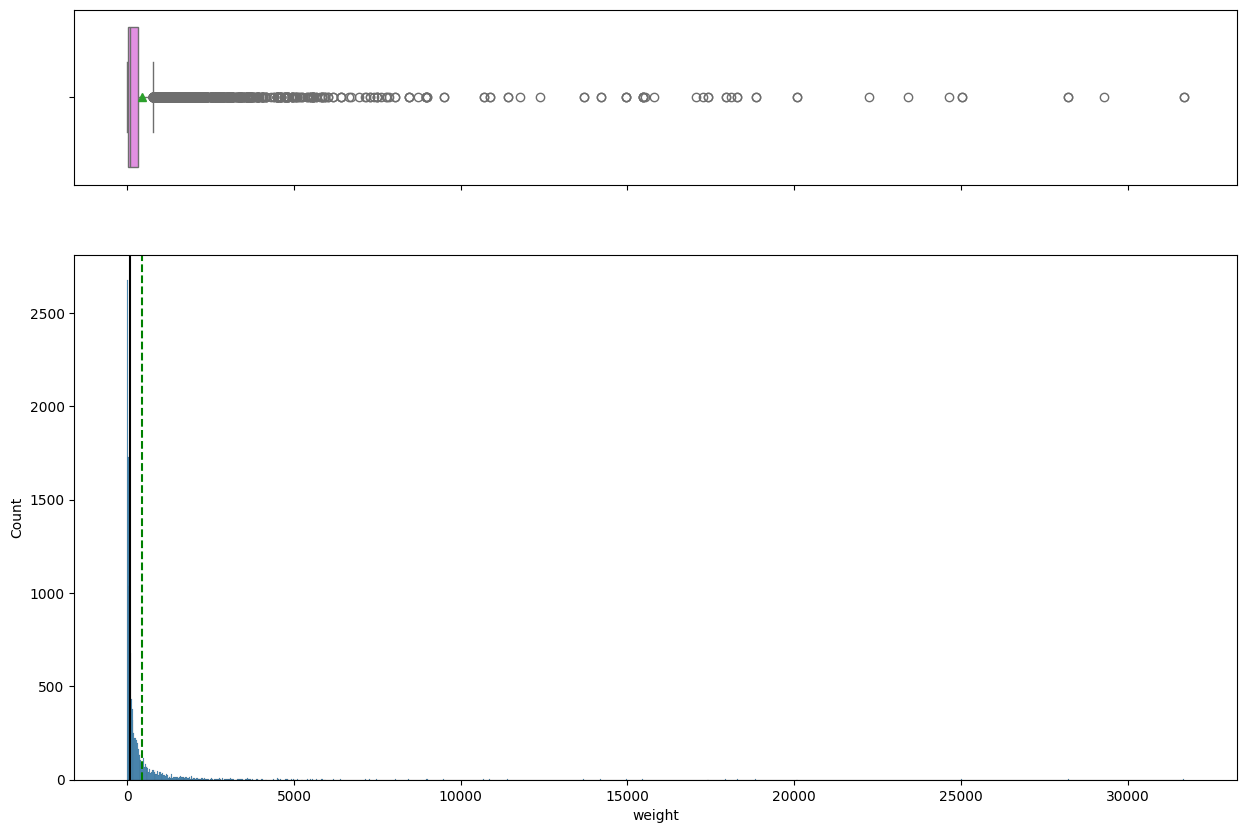

In [94]:
histogram_boxplot(data, "weight")

#### Observations on ageOFocc

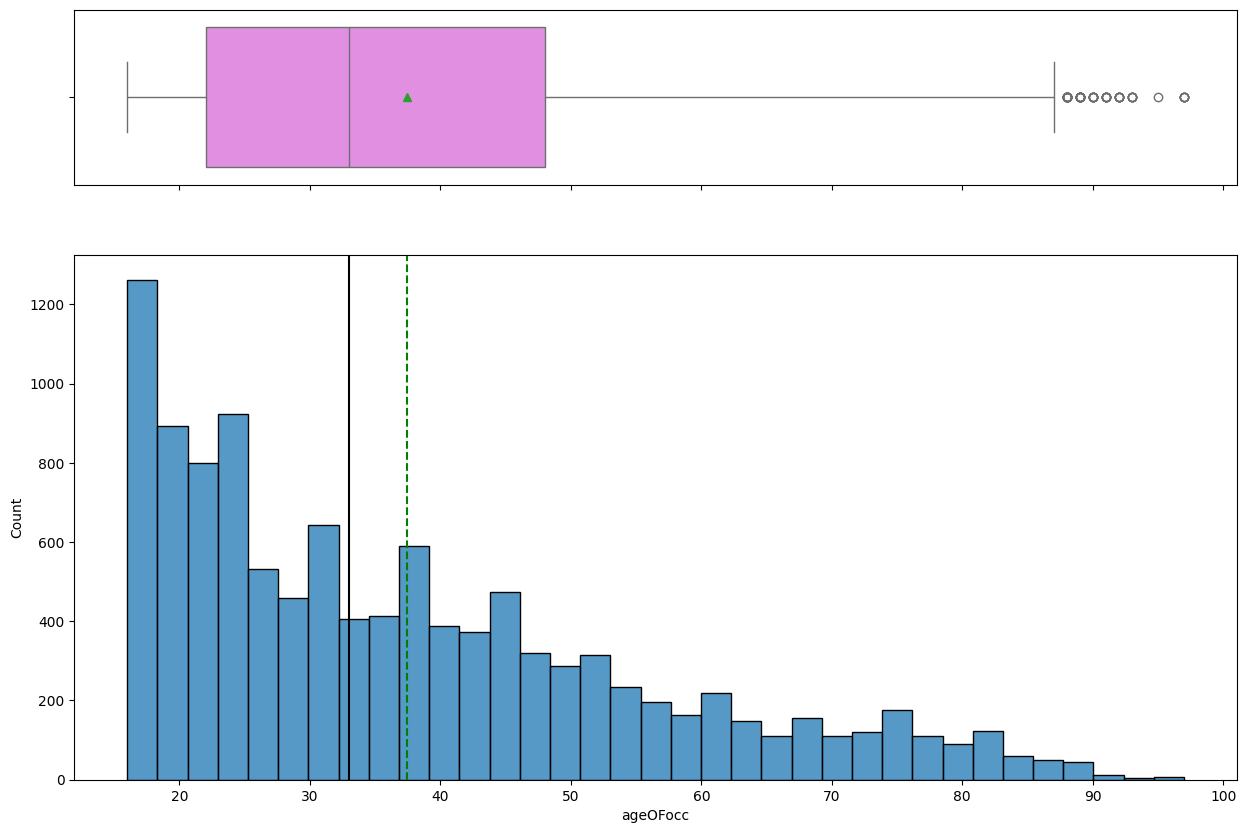

In [95]:
histogram_boxplot(data, "ageOFocc")

#### Observations on dvcat

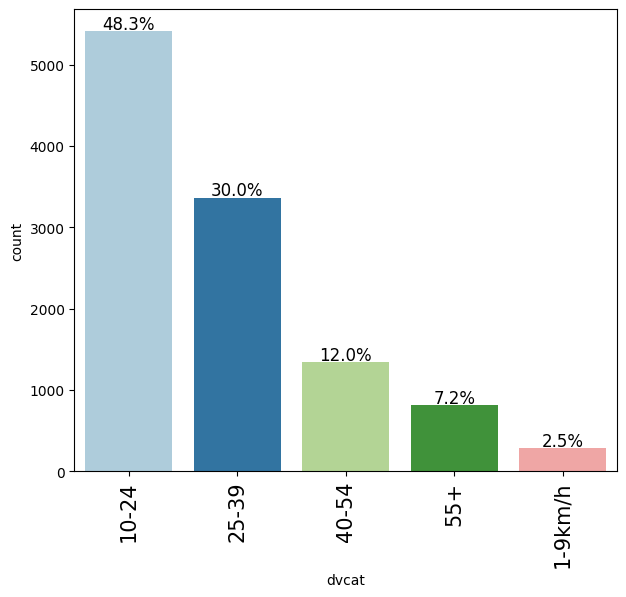

In [96]:
labeled_barplot(data, "dvcat", perc=True)

#### Observations on Survived

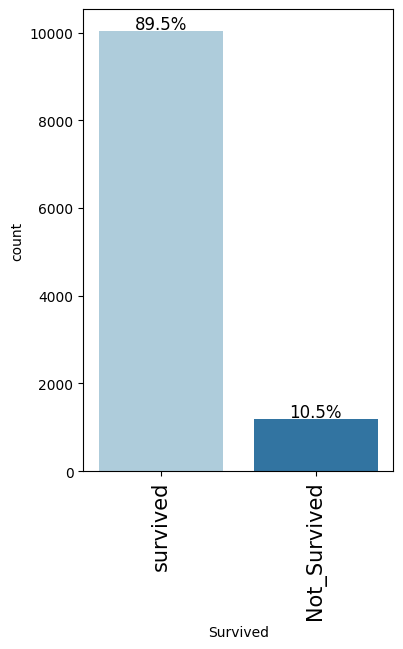

In [97]:
labeled_barplot(data, "Survived", perc=True)

#### Observations on airbag

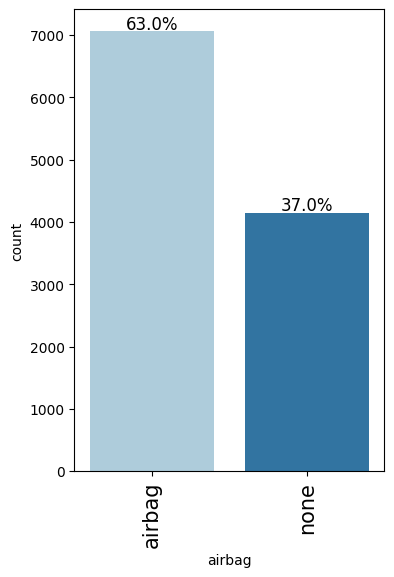

In [98]:
labeled_barplot(data, "airbag", perc=True)

#### Observations on seatbelt

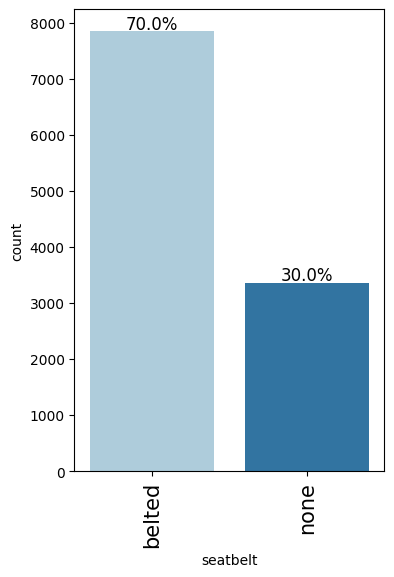

In [99]:
labeled_barplot(data, "seatbelt", perc=True)

#### Observations on frontal

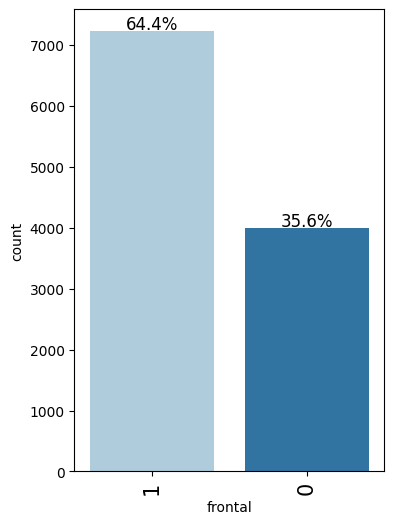

In [100]:
labeled_barplot(data, "frontal", perc=True)

#### Observations on sex

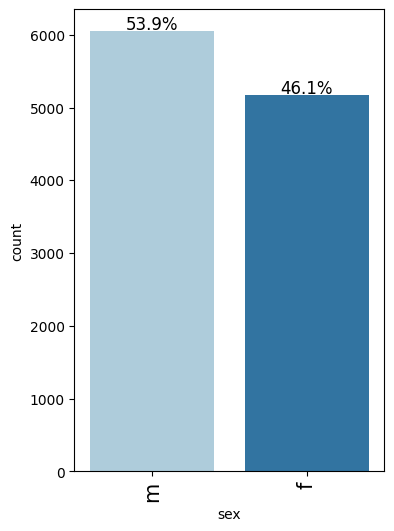

In [101]:
labeled_barplot(data, "sex", perc=True)

#### Observations on abcat

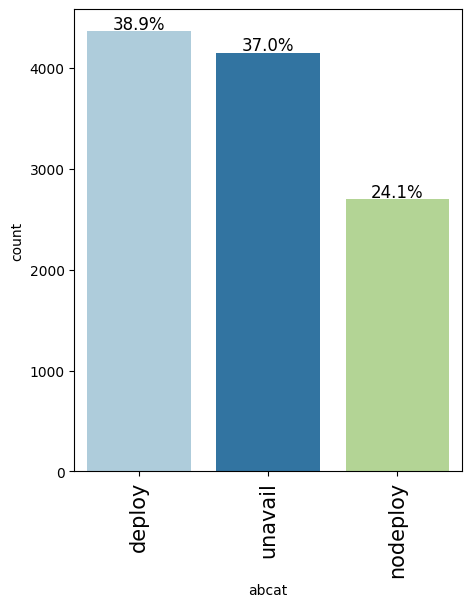

In [102]:
labeled_barplot(data, "abcat", perc=True)

#### Observations on deploy

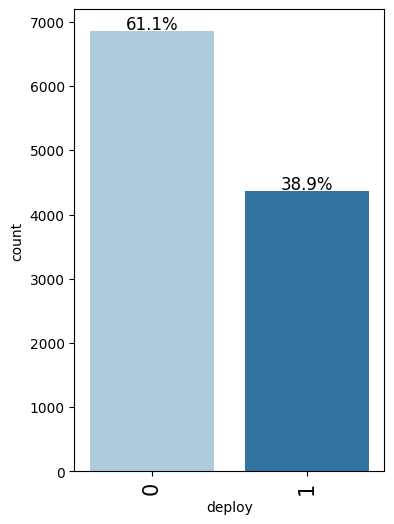

In [103]:
labeled_barplot(data, "deploy", perc=True)

#### Observations on injSeverity

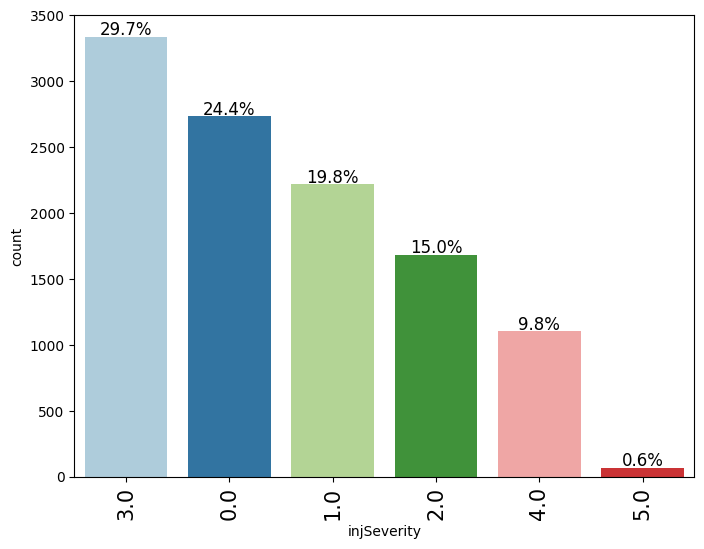

In [104]:
labeled_barplot(data, "injSeverity", perc=True)

### Bivariate Analysis

Survived  Not_Survived  survived    All
dvcat                                  
All               1180     10037  11217
55+                415       394    809
40-54              344      1000   1344
25-39              304      3064   3368
10-24              114      5300   5414
1-9km/h              3       279    282
------------------------------------------------------------------------------------------------------------------------


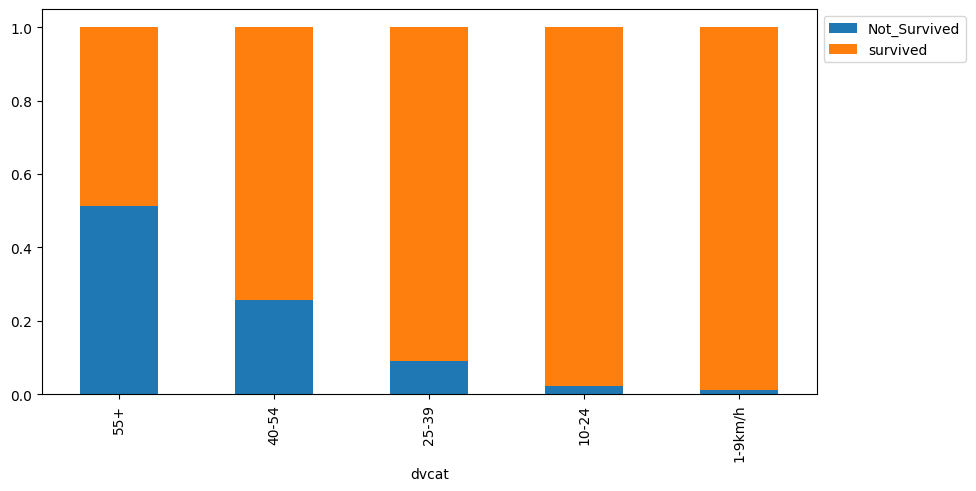

In [105]:
#Observation on dvcat and Survived
stacked_barplot(data, 'dvcat', 'Survived')

Survived  Not_Survived  survived    All
seatbelt                               
All               1180     10037  11217
none               680      2688   3368
belted             500      7349   7849
------------------------------------------------------------------------------------------------------------------------


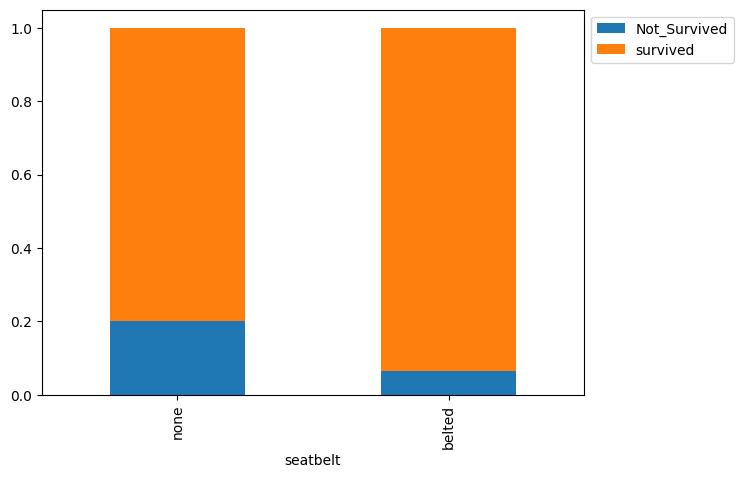

In [106]:
#Observation on seatbelt and Survived
stacked_barplot(data, 'seatbelt', 'Survived')

Survived  Not_Survived  survived    All
frontal                                
All               1180     10037  11217
0                  598      3395   3993
1                  582      6642   7224
------------------------------------------------------------------------------------------------------------------------


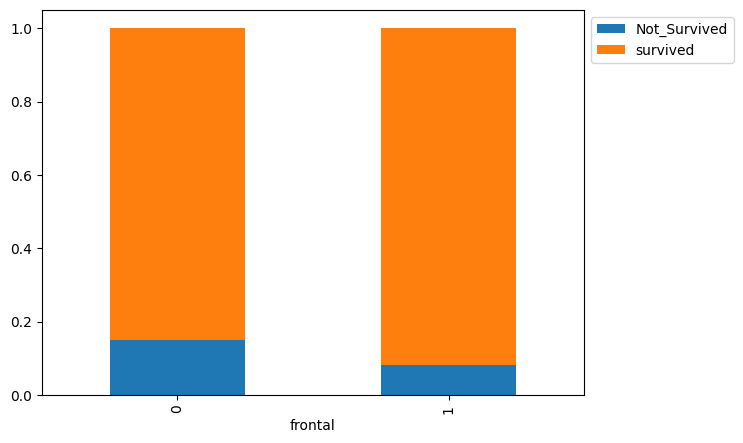

In [107]:
# Observation on frontal and Survived
stacked_barplot(data, "frontal", "Survived")

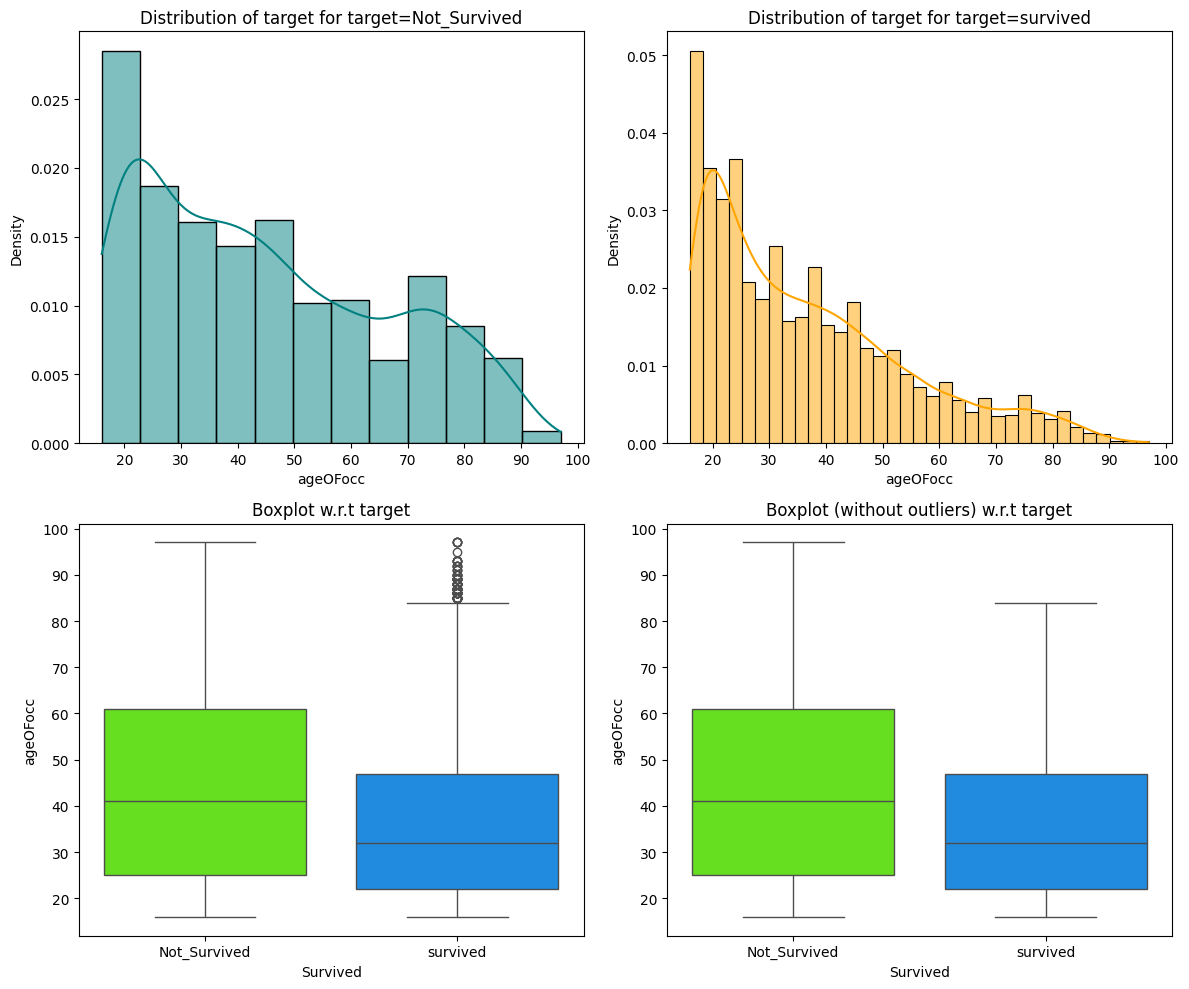

In [108]:
#Distribution of ageOGocc on Survived
distribution_plot_wrt_target(data, "ageOFocc", "Survived")

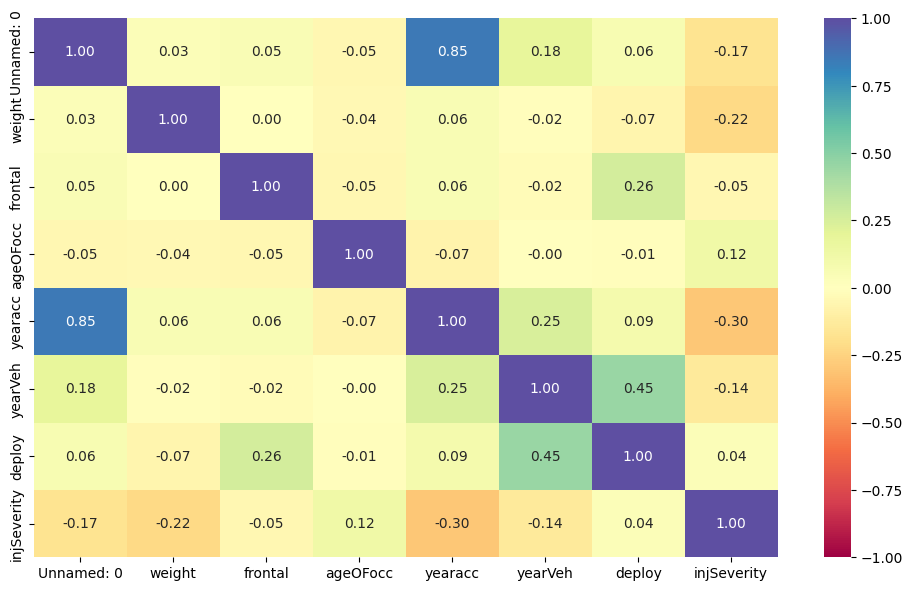

In [109]:
# Correlation map

cols_list = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(12, 7))
sns.heatmap(                                                          #Plot a suitable map to find the correlation
    data[cols_list].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

## Data Preprocessing

### Missing Value Treatment

In [110]:
data.isnull().sum().sum() # Find the null values

77

In [111]:
for i in data.columns:
  if data[i].isnull().sum()>0:
    print(i,data[i].isnull().sum())

injSeverity 77


In [112]:
data['injSeverity'] = data['injSeverity'].fillna(data['injSeverity'].mode()[0])   # Impute the null values with a suitable measure

In [113]:
data.isnull().sum().sum()

0

### Outlier Check

- Let's check for outliers in the data.

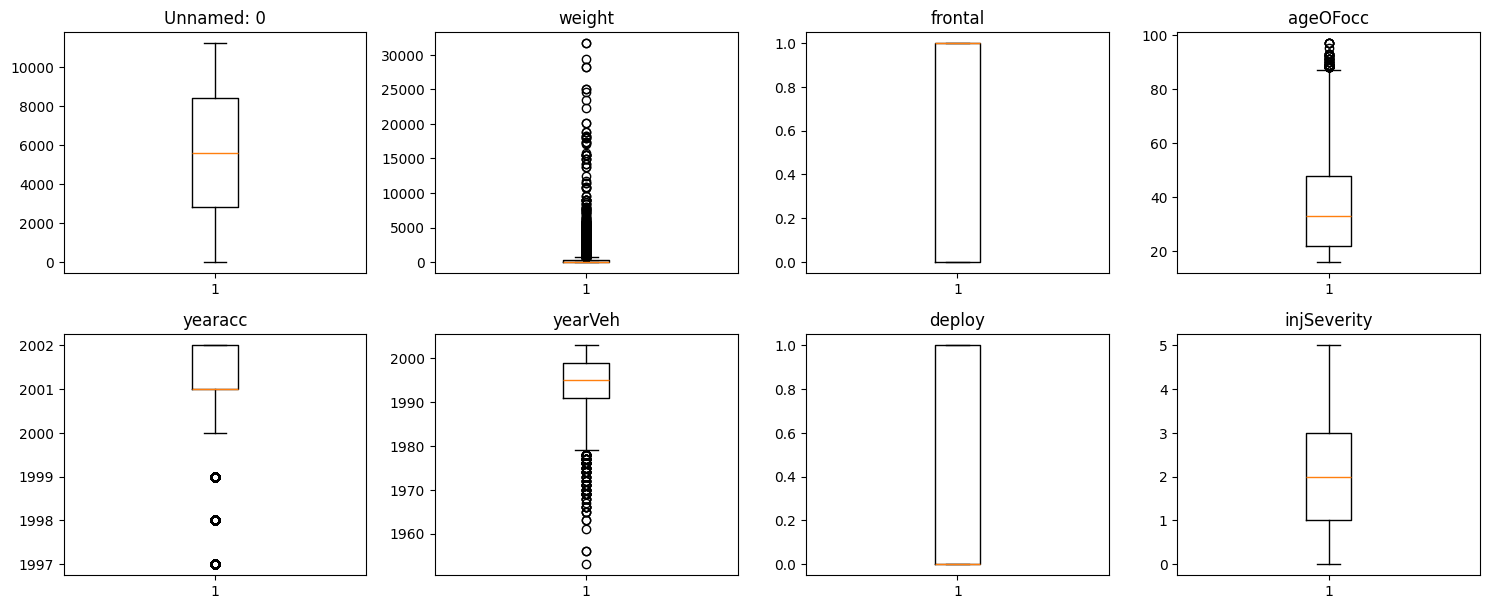

In [114]:
# outlier detection using boxplot
numeric_columns = data.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 12))

for i, variable in enumerate(numeric_columns):
    plt.subplot(4, 4, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

### Data Preparation for modeling

- We want to predict if the car crash was fatal or not.
- Before we proceed to build a model, we'll have to encode categorical features.
- We'll split the data into train and test to be able to evaluate the model that we build on the train data.

### Feature Engineering

In [115]:
data['ageOfVehicle'] = data['yearacc'] - data['yearVeh'] # Create a new feature to find the age of vehicle

In [116]:
data.groupby(['Survived']).ageOfVehicle.median()

,ageOfVehicle
Survived,
Not_Survived,8.00000
survived,6.00000


In [117]:
data.groupby(['Survived']).ageOfVehicle.mean()

,ageOfVehicle
Survived,
Not_Survived,7.95508
survived,6.80422



### Dropping the unique values column

In [118]:
# checking the number of unique values in applicable columns
data["injSeverity"].nunique()

6

In [119]:
data["dvcat"].nunique()

5

In [120]:
data.nunique()

,0
Unnamed: 0,11217
dvcat,5
weight,4551
Survived,2
airbag,2
seatbelt,2
frontal,2
sex,2
ageOFocc,80
yearacc,6


**Let's drop the unnecessary columns first before we proceed forward**.

In [121]:
unes_cols = ['Unnamed: 0', 'weight', 'yearVeh', 'caseid']

In [122]:
data = data.drop(unes_cols, axis=1) # drop all the unnecessary columns

### Encoding

In [123]:
data["Survived"].replace({'survived':1, "Not_Survived":0},inplace=True) # Encode the target variable

In [124]:
# defining the dependent and independent variables
X = data.drop(["Survived"], axis=1)
y = data["Survived"]

In [125]:
# creating dummy variables
X = pd.get_dummies(                                                  # Perform dummy encoding on all the categorical variables
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)

X.head()

,frontal,ageOFocc,yearacc,deploy,injSeverity,ageOfVehicle,dvcat_10-24,dvcat_25-39,dvcat_40-54,dvcat_55+,airbag_none,seatbelt_none,sex_m,abcat_nodeploy,abcat_unavail,occRole_pass
0,1,32,1997,0,4.00000,10.00000,False,False,False,True,True,True,True,False,True,False
1,0,54,1997,0,4.00000,3.00000,False,True,False,False,False,False,False,True,False,False
2,1,67,1997,0,4.00000,5.00000,False,False,False,True,True,False,True,False,True,False
3,1,64,1997,0,4.00000,5.00000,False,False,False,True,True,False,False,False,True,True
4,1,23,1997,0,4.00000,11.00000,False,False,False,True,True,True,True,False,True,False


### Data Split

In [126]:
# splitting the data in 70:30 ratio for train to test data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [127]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Shape of Training set : ", y_train.shape)
print("Shape of test set : ", y_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (7851, 16)
Shape of test set :  (3366, 16)
Shape of Training set :  (7851,)
Shape of test set :  (3366,)
Percentage of classes in training set:
Survived
1   0.89530
0   0.10470
Name: proportion, dtype: float64
Percentage of classes in test set:
Survived
1   0.89364
0   0.10636
Name: proportion, dtype: float64


## Model Building

#### First, let's create functions to calculate different metrics and confusion matrix so that we don't have to use the same code repeatedly for each model.
* The model_performance_classification_sklearn function will be used to check the model performance of models.
* The confusion_matrix_sklearn function will be used to plot the confusion matrix.

In [128]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [129]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Logistic Regression (with Sklearn)

In [130]:
model = LogisticRegression(random_state=1)
model.fit(X_train, y_train)

LogisticRegression(random_state=1)

#### Checking model performance on training set

In [132]:
logistic_reg_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
logistic_reg_perf_train

,Accuracy,Recall,Precision,F1
0,0.98128,0.99189,0.98726,0.98957


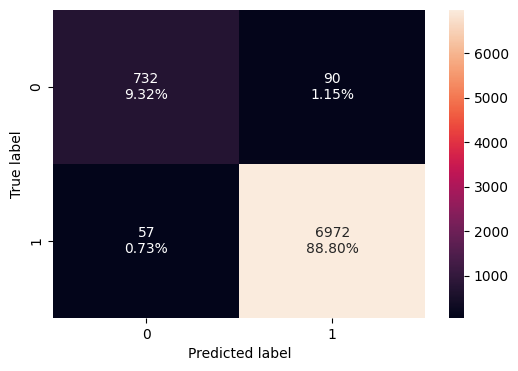

In [133]:
confusion_matrix_sklearn(model, X_train, y_train)

#### Checking model performance on test set

In [139]:
logistic_reg_perf_test = model_performance_classification_sklearn(model, X_test, y_test)

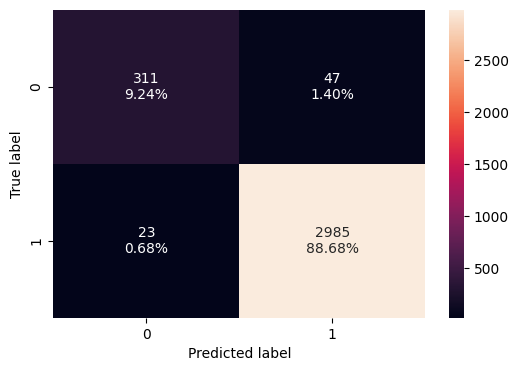

In [140]:
confusion_matrix_sklearn(model, X_test, y_test)

#### ROC-AUC


Train ROC-AUC score is : 0.9862685662007138

Test ROC-AUC score is : 0.9857391462617379


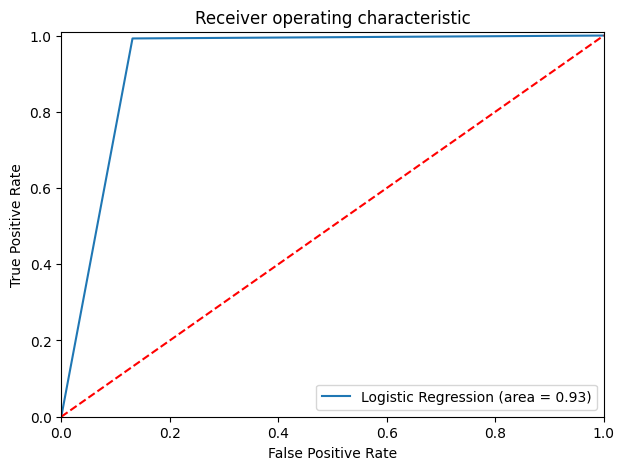

In [141]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))
logit_roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Feature: frontal, Score: 0.96153
Feature: ageOFocc, Score: -0.03126
Feature: yearacc, Score: 0.00833
Feature: deploy, Score: 0.24354
Feature: injSeverity, Score: -4.21167
Feature: ageOfVehicle, Score: 0.08528
Feature: dvcat_10-24, Score: 1.48228
Feature: dvcat_25-39, Score: 0.07822
Feature: dvcat_40-54, Score: -0.58360
Feature: dvcat_55+, Score: -1.25386
Feature: airbag_none, Score: -0.43480
Feature: seatbelt_none, Score: -0.82644
Feature: sex_m, Score: -0.46234
Feature: abcat_nodeploy, Score: 0.18312
Feature: abcat_unavail, Score: -0.43480
Feature: occRole_pass, Score: -0.25230


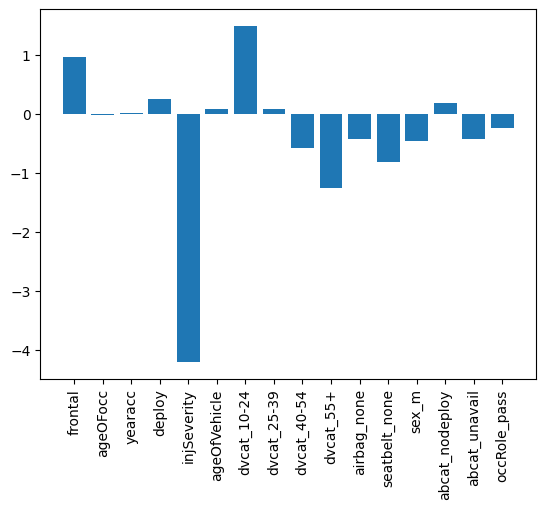

In [142]:
# get importance
importance = model.coef_[0]
importance
# summarize feature importance
column_names=X_train.columns
for i, (col_name, score) in enumerate(zip(column_names, importance)):
    print('Feature: %s, Score: %.5f' % (col_name, score))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

### Building Linear Discriminant Analysis

In [144]:
#Build LDA Model
model = LinearDiscriminantAnalysis()
model.fit(X_train,y_train)

LinearDiscriminantAnalysis()

####Checking model performance on training set

In [145]:
lda_perf_train = model_performance_classification_sklearn(
    model, X_train, y_train
)
lda_perf_train

,Accuracy,Recall,Precision,F1
0,0.95644,0.98549,0.96651,0.97591


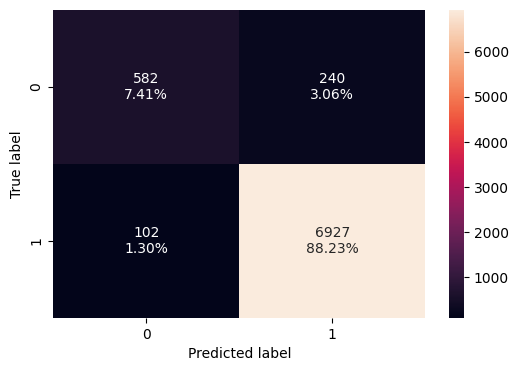

In [146]:
confusion_matrix_sklearn(model, X_train, y_train)

####Checking model performance on test set

In [149]:
lda_perf_test = model_performance_classification_sklearn(model, X_test, y_test)

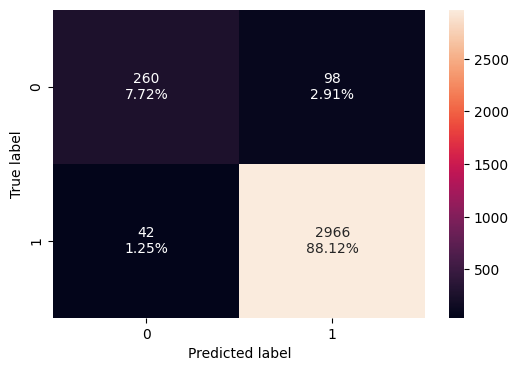

In [150]:
confusion_matrix_sklearn(model, X_test, y_test)


Train ROC-AUC score is : 0.9661944485117097

Test ROC-AUC score is : 0.9709034752763581


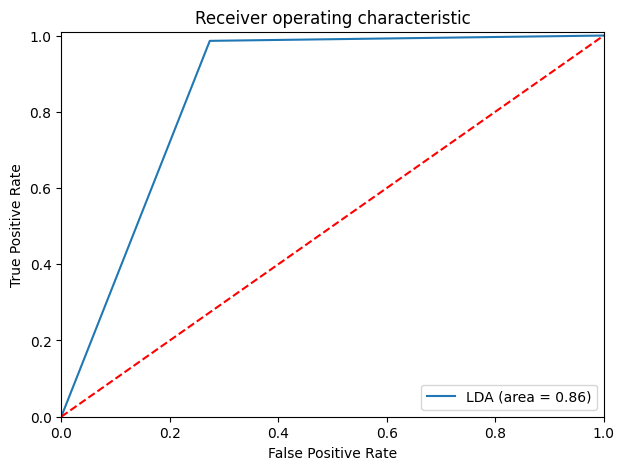

In [151]:
print("\nTrain ROC-AUC score is : {}".format(roc_auc_score(y_train,model.predict_proba(X_train)[:,1])))

print("\nTest ROC-AUC score is : {}".format(roc_auc_score(y_test,model.predict_proba(X_test)[:,1])))
lda_roc_auc_test = roc_auc_score(y_test, model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, model.predict(X_test))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="LDA (area = %0.2f)" % lda_roc_auc_test)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.01])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

Feature: frontal, Score: 0.88603
Feature: ageOFocc, Score: -0.02695
Feature: yearacc, Score: 2.31970
Feature: deploy, Score: 0.24497
Feature: injSeverity, Score: -1.34188
Feature: ageOfVehicle, Score: 0.04227
Feature: dvcat_10-24, Score: -0.00336
Feature: dvcat_25-39, Score: -0.20710
Feature: dvcat_40-54, Score: -1.73600
Feature: dvcat_55+, Score: -5.18089
Feature: airbag_none, Score: -0.14655
Feature: seatbelt_none, Score: -0.51319
Feature: sex_m, Score: -0.32402
Feature: abcat_nodeploy, Score: -0.13408
Feature: abcat_unavail, Score: -0.14655
Feature: occRole_pass, Score: -0.26267


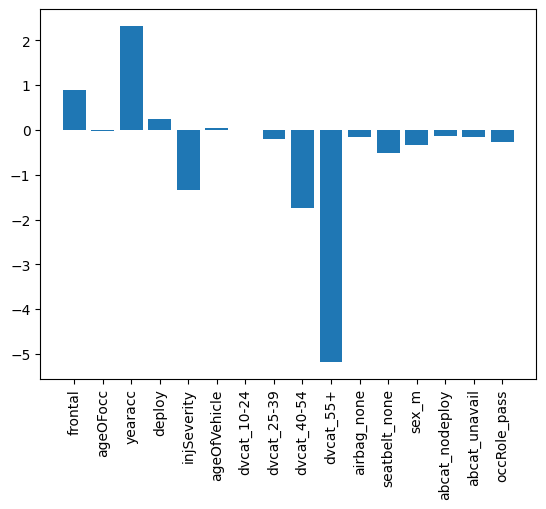

In [152]:
# get importance
importance = model.coef_[0]
importance
# summarize feature importance
column_names=X_train.columns
for i, (col_name, score) in enumerate(zip(column_names, importance)):
    print('Feature: %s, Score: %.5f' % (col_name, score))
# plot feature importance
plt.bar([x for x in X_train.columns], importance)
plt.xticks(rotation=90)
plt.show()

## Model Performance Comparison and Final Model Selection

In [153]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        logistic_reg_perf_train.T,
        lda_perf_train.T,
            ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression Base",
    "Linear Discriminant Analysis Base",
]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression Base,Linear Discriminant Analysis Base
Accuracy,0.98128,0.95644
Recall,0.99189,0.98549
Precision,0.98726,0.96651
F1,0.98957,0.97591


In [155]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        logistic_reg_perf_test.T,
        lda_perf_test.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression Base",
    "Linear Discriminant Analysis Base",
]
print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


,Logistic Regression Base,Linear Discriminant Analysis Base
Accuracy,0.97920,0.95841
Recall,0.99235,0.98604
Precision,0.98450,0.96802
F1,0.98841,0.97694


## Business Insights & Recommendations